<a href="https://colab.research.google.com/github/Aniruddha18-SPD/DisasterTweets/blob/main/Trinitee_Aniruddha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Necessary Libraries

In [ ]:
!pip3 install transformers
!pip3 install nltk
!pip3 install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 39.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import google 
import re
from sklearn.model_selection import train_test_split
import transformers
from transformers import BertTokenizer
from collections import Counter
import nltk
import string
nltk.download('punkt') # Download the punkt package for word tokenization
nltk.download('stopwords') # Download the stopwords package
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from sklearn.metrics import f1_score, accuracy_score
import tensorflow as tf
import math, os, re, time, random, string
from nltk.corpus import stopwords
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.style.use('ggplot')   #for optimum aesthetics 
import seaborn as sns

#natural language processing
from collections import defaultdict
import wordcloud

#ignore warnings because they are annoying
import warnings
warnings.filterwarnings('ignore')

#for neural nets
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#mount google drive to import necessary csvs
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import training and testing data from shared folder
train_df = pd.read_csv('/content/drive/My Drive/ML Group Project/train.csv')    
test_df = pd.read_csv('/content/drive/My Drive/ML Group Project/test.csv')

In [ ]:
display(train_df)         #display contents of training data
print(len(test_df))       #length of test data
print(len(train_df[train_df['target'] == 1]))     #number of training examples with target value of 1
print(len(train_df[train_df['target'] == 0]))     #number of training examples with target value of 0

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


3263
3271
4342


In [ ]:
print(train_df.columns)

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')


In [ ]:
# Split the data into training and validation sets
train_data, val_data = train_test_split(train_df, test_size=0.1, random_state=42)

# Print the sizes of the two sets
print("Training set size:", len(train_data))
print("Validation set size:", len(val_data))

Training set size: 6851
Validation set size: 762


In [ ]:
#seperate X_train and Y_train values
X_train = train_data[['id', 'keyword', 'location', 'text']]
Y_train = train_data[['target']]
X_test = test_df[['id', 'keyword', 'location', 'text']]
X_val = val_data[['id', 'keyword', 'location', 'text']]
Y_val = val_data[['target']]

## Implement Baseline

Defining a simple 'baseline(X)' function to set the baseline for the project. The function below loops over each tweet in the training dataset
and searches if the word 'fire' exists in that particular tweet. A simple calculation is then done to see the number of tweets where the word 'fire'
was seen. The predictions are then taken and a Classification report is printed for the baseline function.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import metrics
from keras import losses

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

def baseline(X):
  Y_pred = np.empty((len(X), 1))
  for i, x in enumerate(X['text']):
    if 'fire' in x:
      Y_pred[i] = 1
    else:
      Y_pred[i] = 0
  return Y_pred

Y_pred_baseline = baseline(X_train)

print("Total Predictions: ", len(Y_pred_baseline))    #total predictions made by the model
print("Predicted Positive Case:", len(Y_pred_baseline[Y_pred_baseline == 1]))   #the total number of tweets where the word 'fire' existed
print("Actual Positive Case:", len(Y_train[Y_train['target'] == 1]))      #the total number of tweets with target value == 1 in the datset
print("Total Tweets:", len(Y_train))        #total tweets in the dataset

bce = losses.BinaryCrossentropy(from_logits = True)
print("Loss:", bce(Y_train, Y_pred_baseline).numpy())

class_report  = classification_report(Y_train, Y_pred_baseline)   #printing the Classification report of the baseline function
print(class_report)

acc_baseline = accuracy_score(Y_train, Y_pred_baseline)     #calculating the accuracy for the baseline
print("The accuracy of the baseline is : ", acc_baseline)


Total Predictions:  6851
Predicted Positive Case: 333
Actual Positive Case: 2935
Total Tweets: 6851
Loss: 0.6869434337809505
              precision    recall  f1-score   support

           0       0.59      0.98      0.73      3916
           1       0.75      0.08      0.15      2935

    accuracy                           0.60      6851
   macro avg       0.67      0.53      0.44      6851
weighted avg       0.66      0.60      0.49      6851

The accuracy of the baseline is :  0.5956794628521384


In [ ]:
#converting a numpy array to a 1-d array
val = (Y_pred_baseline.flatten()).astype(int)   
print(val)

[0 0 0 ... 0 0 0]


In [ ]:
# Calculating the f1 score for the baseline model. Here 'val' is the flattened 1-d predictions .

f1_score_val = f1_score(Y_train, val)
print("The f1_score is : ", f1_score_val)

The f1_score is :  0.15238678090575275


## Data Analysis

In this section, there are 6 different graphs tbat help us understand and vizualize the data:

1. **Distribution of Classification Groups -** This graph shows how many of the tweets in our data are about real disasters (the positive class) and how many are not (the negative class).

2. **Most Common Words Across All Tweets -** This graph shows the words that appear most frequently across all the tweets in our data. This lets us know what words will likely have a lot of influence on our model's prediction because they occur often in one of the classes, and what words will have very little influence because they occur often in both classes.
3. **Most Common Words for Non-Disasters -** This graph shows the words that appear most frequenctly across the non-disaster tweets. This lets us know what words will likely have a lot of influence on our model's prediction of the negative class because they tend to show up in a tweet not discussing a disaster.
4. **Most Common Words for Disasters -** This graph shows the words that appear most frequenctly across the disaster tweets. This lets us know what words will likely have a lot of influence on our model's prediction of the positive class because they tend to show up in tweets that discuss disasters.
5. **Most Common Bigrams Across Non-Disaster tweets -** This graph shows the bigrams that appear most frequenctly across the non-disaster tweets. This lets us know what word pairings will likely have a lot of incfluence on our model's prediction of the negative class because they tend to show up in a tweet not dicussing a disaster.
6. **Most Common Bigrams Across Disaster tweets -** This graph shows the bigrams that appear most frequenctly across the disaster tweets. This lets us know what word pairings will likely have a lot of influence on our model's prediction of the positive class because they tend to show up in tweets that discuss disasters.

In [ ]:
'''calculating the length of the longest tweet in the training dataset and printing the tweet itself. '''

import numpy as np

# Convert X_train to a numpy array
X_train_array = np.array(X_train['text'])

# Find the length of each tweet
tweet_lengths = np.array([len(tweet) for tweet in X_train_array])

# Find the index of the longest tweet
longest_tweet_index = np.argmax(tweet_lengths)

# Get the longest tweet
longest_tweet = X_train_array[longest_tweet_index]

print("The longest tweet is:")
print(longest_tweet)
print("Length:", len(longest_tweet))
len_longest_tweet = len(longest_tweet)

The longest tweet is:
when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????
Length: 157


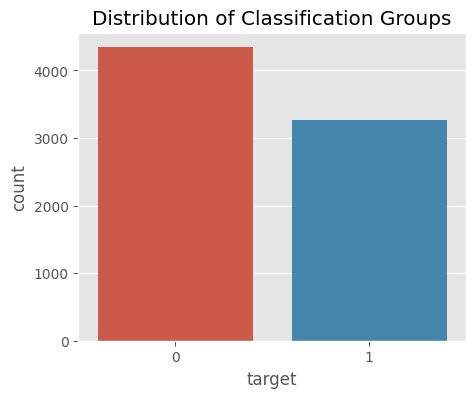

In [ ]:
#set figure size
fig, ax = plt.subplots(figsize = (5, 4))

#create graphs
graph1 = sns.countplot(x = 'target', data = train_df)

#give title and plot
plt.title('Distribution of Classification Groups')
plt.show(graph1)

In [ ]:
'''Cleaning data for better visualization'''

#remove punctuation
def remove_punctuation(x):
    return x.translate(str.maketrans('', '', string.punctuation))

#remove stopwords
def remove_stopwords(x):
    return ' '.join([i for i in x.split() if i not in wordcloud.STOPWORDS])

#remove words less than 4
def remove_less_than(x):
    return ' '.join([i for i in x.split() if len(i) > 3])

#remove words with non-alphabet characters
def remove_non_alphabet(x):
    return ' '.join([i for i in x.split() if i.isalpha()])

def strip_all_entities(x):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split())

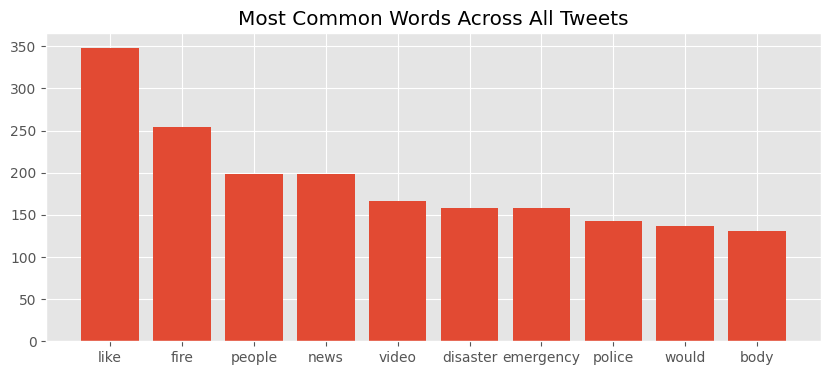

In [ ]:
"""
  This function takes a dataframe and removes all symbols as well as non-alphabet entities.
  It returns a bar plot of the most common words across all the tweets.
"""

def plot_common_words(df):
  df['text'] = df['text'].apply(strip_all_entities)   #remove url from text
  df['text'] = df['text'].apply(remove_non_alphabet)    #remove all non_alphabetic characters
  df['text'] = df['text'].apply(remove_less_than)
  all_tweets = " ".join(df['text'])
  words = nltk.word_tokenize(all_tweets)      # tokenize the tweets to count the most repeated words
  stop_words = set(stopwords.words('english'))    # define and store all the stop words
  words = [word.lower() for word in words if word.lower() not in stop_words and word not in string.punctuation] #convert each character to lowercase 
  # and check if the word is a stop word or a punctuation. If it is neither then append it in a list 
  words_counter = Counter(words)    #count the number of times each word is repeated
  common_words = dict(words_counter.most_common(10))  #find the 10 most common words 
  return common_words

common_all_tweets = plot_common_words(train_df)   #pass in all tweets
fig, ax = plt.subplots(figsize = (10, 4))
plt.bar(common_all_tweets.keys(), common_all_tweets.values())
plt.title("Most Common Words Across All Tweets")
plt.show()



Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')


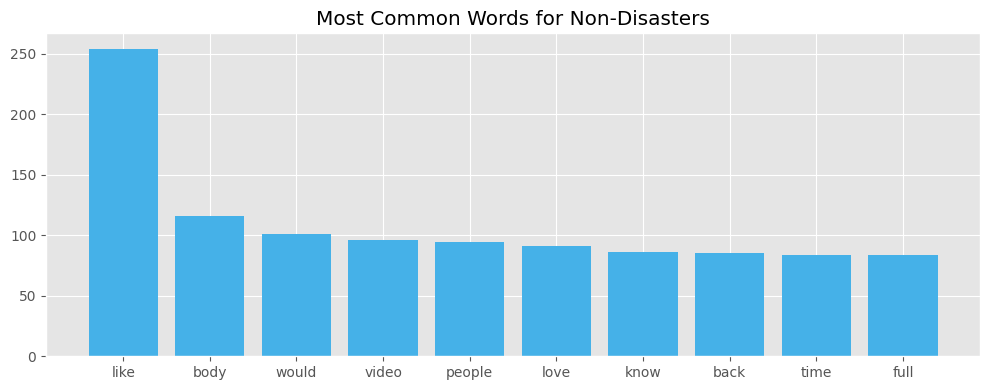

In [ ]:
print(train_df.columns)
common_positive = plot_common_words(train_df[train_df['target'] == 0])  #pass in non disaster tweets
fig, ax = plt.subplots(figsize = (10, 4))
plt.bar(common_positive.keys(), common_positive.values(), color = '#45B1E8')
plt.title("Most Common Words for Non-Disasters")
plt.tight_layout()
plt.show()

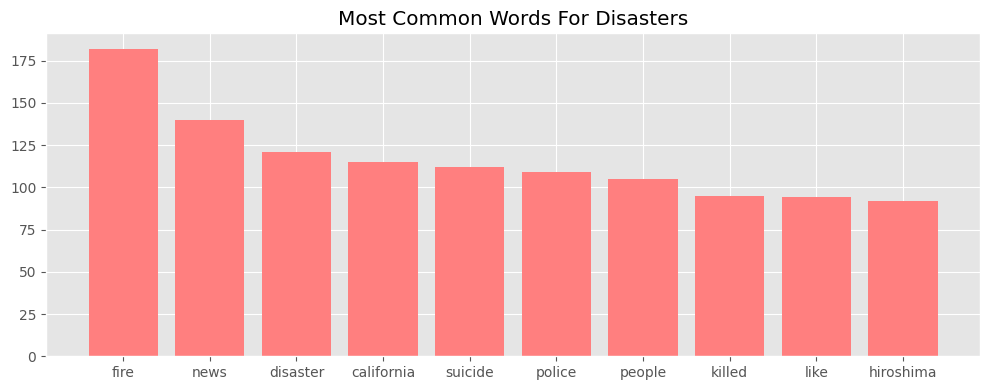

In [ ]:
common_negative = plot_common_words(train_df[train_df['target'] == 1])  #pass in disaster tweets
fig, ax = plt.subplots(figsize = (10, 4))
plt.bar(common_negative.keys(), common_negative.values(), color = '#FF7F7F')
plt.title("Most Common Words For Disasters")
plt.tight_layout()
plt.show()

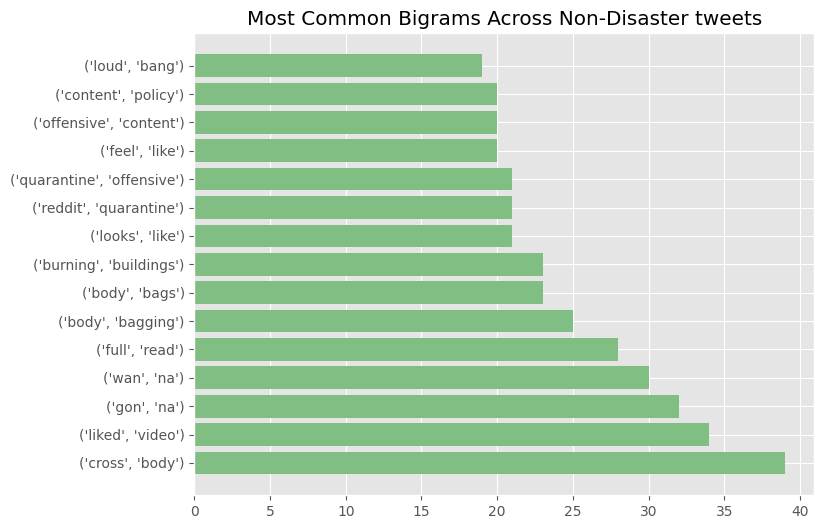

In [ ]:
"""
  This function takes a dataframe and removes all symbols as well as non-alphabet entities.
  It returns a bar plot of the most bigrams across the tweets. A bigram is an n-gram for n=2. 
"""

def plot_common_words_bia(df):
  df['text'] = df['text'].apply(strip_all_entities)   #remove url from text
  df['text'] = df['text'].apply(remove_non_alphabet)    #remove all non_alphabetic characters
  df['text'] = df['text'].apply(remove_less_than)
  all_tweets = " ".join(df['text'])
  words = nltk.word_tokenize(all_tweets)      # tokenize the tweets to count the most repeated words
  stop_words = set(stopwords.words('english'))    # define and store all the stop words
  words = [word.lower() for word in words if word.lower() not in stop_words and word not in string.punctuation] #convert each character to lowercase 
  # and check if the word is a stop word or a punctuation. If it is neither then append it in a list 
  bigrams = list(nltk.bigrams(words)) # search for all the bigrams 
  bigram_counter = Counter(bigrams)   # count all distinct bigrams
  common_bigrams = dict(bigram_counter.most_common(15)) # number of bigrams to plot 
  return common_bigrams

common_bia = plot_common_words_bia(train_df[train_df['target'] == 0]) #pass in non disaster tweets
fig, ax = plt.subplots(figsize = (8, 6))
y = [str(key) for key in common_bia.keys()]
x = list(common_bia.values())
plt.barh(y, x, color = '#81BE83')   #plot the graph horizontally
plt.title("Most Common Bigrams Across Non-Disaster tweets")
plt.show()


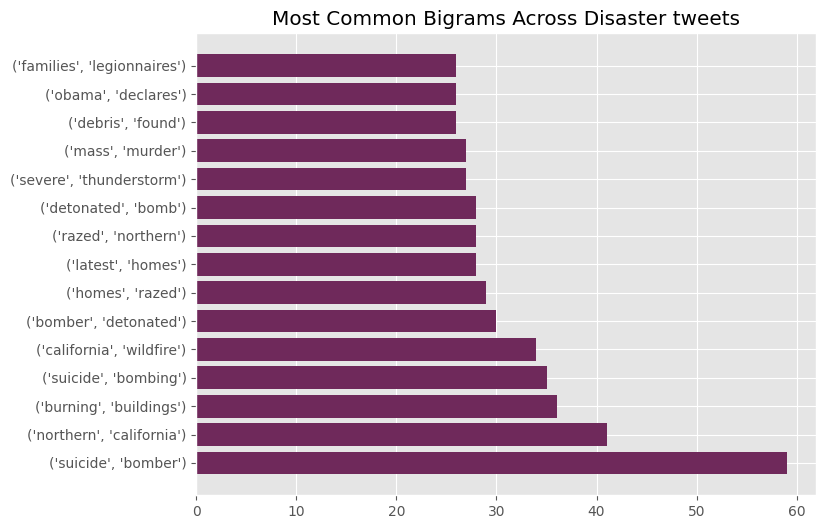

In [ ]:
common_bia = plot_common_words_bia(train_df[train_df['target'] == 1])   #pass in disaster tweets
fig, ax = plt.subplots(figsize = (8, 6))
y = [str(key) for key in common_bia.keys()]
x = list(common_bia.values())
plt.barh(y, x, color = '#6F295B')
plt.title("Most Common Bigrams Across Disaster tweets")
plt.show()

# Modeling


## Model 1: CNN

In [ ]:
# Load the data
train_data = pd.read_csv('/content/drive/My Drive/ML Group Project/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/ML Group Project/test.csv')

In [ ]:
'''defining a CNN model'''

from tensorflow.keras.models import Sequential

# Get the training and test data
X_train = train_df['text'].values
y_train = train_df['target'].values
X_test = test_df['text'].values

# Create a tokenizer to convert words to integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Get the size of the vocabulary
vocab_size = len(tokenizer.word_index) + 1

# Convert the text to sequences of integers
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to have the same length
max_length = max(len(seq) for seq in X_train)
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

# Define the model
embedding_dim = 8     #the embedding size
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))    #defining a dense layer
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=2, batch_size=16, validation_split=0.2)

Epoch 1/2
381/381 [==============================] - 27s 43ms/step - loss: 0.6111 - accuracy: 0.6560 - val_loss: 0.5016 - val_accuracy: 0.7603
Epoch 2/2
381/381 [==============================] - 4s 10ms/step - loss: 0.3632 - accuracy: 0.8519 - val_loss: 0.4989 - val_accuracy: 0.7722


## Model 2 : BERT

### Experiment I: Bert Model + Meta Train

The Bidirectional Encoder Representations from Transformers (BERT) is a language model developed by Google which has achieved state-of-the-art results in a variety of NLP tasks. BERT's key innovation is applying bidirectional training (actually it is non-directional, as it reads the entire sequence of words at once) of the encoder part of a Transformer.

In this section, we wanted to experiment with providing a model with 'meta-data' along with the training data to improve the accuracy. Meta-data here is the counts of each unique factor seen in each tweet. Here unique factors can be symbols, emojis , mentions, links and so on. Each of these elements are counted for each tweet and new columns are created to store the values. Meta-data is passed in as a seperate dataframe along with training data. This way, we give a model the full picture of how each tweet is structured to provide a further detailed context. 

In [ ]:
train = train_df    #import training and testing data from shared folder
test = test_df      
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Deeds Reason this earthquake ALLAH Forgive,1
1,4,NaN,NaN,Forest fire near Ronge Sask Canada,1
2,5,NaN,NaN,residents asked shelter place being notified o...,1
3,6,NaN,NaN,people receive wildfires evacuation orders Cal...,1
4,7,NaN,NaN,Just sent this photo from Ruby Alaska smoke fr...,1


In [ ]:
#save ID
train_id = train['id']
test_id = test['id']

#drop from train and test
columns = {'id', 'location'}
train = train.drop(columns = columns)
test = test.drop(columns = columns)

#fill missing with unknown
train['keyword'] = train['keyword'].fillna('unknown')
test['keyword'] = test['keyword'].fillna('unknown')

#add keyword to tweets
train['text'] = train['text'] + ' ' + train['keyword']
test['text'] = test['text'] + ' ' + test['keyword']

#drop fkeyword rom train and test
columns = {'keyword'}
train = train.drop(columns = columns)
test = test.drop(columns = columns)

#combine so we work smarter, not harder
total = train.append(test)

In [ ]:
print('There are', len(train), 'rows in the train set')
print('There are', len(test), 'rows in the test set')

There are 7613 rows in the train set
There are 3263 rows in the test set


In [ ]:
total['word count'] = total['text'].apply(lambda x: len(x.split()))

#split so we can use updated train set with new feature
train = total[:len(train)]

In [ ]:
#create column for the number of characters in a tweet
total['character count'] = total['text'].apply(lambda x: len(x))

#split so we can use updated train set with new feature
train = total[:len(train)]

In [ ]:
# function to calculate what the average word length in each tweet is
def average_word_length(x):
    x = x.split()
    return np.mean([len(i) for i in x])

#broadcast to text column
total['average word length'] = total['text'].apply(average_word_length)

#split so we can use updated train set with new feature
train = total[:len(train)]

In [ ]:
#add stopword count
total['stopword count'] = total['text'].apply(lambda x: len([i for i in x.lower().split() if i in wordcloud.STOPWORDS]))

#add url count
total['url count'] = total['text'].apply(lambda x: len([i for i in x.lower().split() if 'http' in i or 'https' in i]))

# add mention count
total['mention count'] = total['text'].apply(lambda x: len([i for i in str(x) if i == '@']))

# add hashtag count
total['hashtag count'] = total['text'].apply(lambda x: len([i for i in str(x) if i == '#']))

#add stopword ratio
total['stopword ratio'] = total['stopword count'] / total['word count']

#add punctuation count
total['punctuation count'] = total['text'].apply(lambda x: len([i for i in str(x) if i in string.punctuation]))

#split so we can use updated train set
train = total[:len(train)]

disaster = train['target'] == 1

In [ ]:
#remove punctuation
def remove_punctuation(x):
    return x.translate(str.maketrans('', '', string.punctuation))

#remove stopwords
def remove_stopwords(x):
    return ' '.join([i for i in x.split() if i not in wordcloud.STOPWORDS])

#remove words less than 4 
def remove_less_than(x):
    return ' '.join([i for i in x.split() if len(i) > 3])

#remove words with non-alphabet characters
def remove_non_alphabet(x):
    return ' '.join([i for i in x.split() if i.isalpha()])

def strip_all_entities(x):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split())

In [ ]:
#check strip_all_entities functionality
strip_all_entities('@shawn Titanic #tragedy could have been prevented Economic \
                   Times: Telegraph.co.ukTitanic tragedy could have been preve... http://bet.ly/tuN2wx')

'Titanic tragedy could have been prevented Economic Times Telegraph co ukTitanic tragedy could have been preve'

In [ ]:
PROCESS_TWEETS = False
if PROCESS_TWEETS:
    #apply all of above functions
    total['text'] = total['text'].apply(lambda x: x.lower())
    total['text'] = total['text'].apply(lambda x: re.sub(r'https?://\S+|www\.\S+', '', x, flags = re.MULTILINE))
    total['text'] = total['text'].apply(remove_punctuation)
    total['text'] = total['text'].apply(remove_stopwords)
    total['text'] = total['text'].apply(remove_less_than)
    total['text'] = total['text'].apply(remove_non_alphabet)
    total['text'] = total['text'].apply(spell_check)

In [ ]:
import ast

# Open the file containing the dictionary of Contractions
with open('/content/drive/My Drive/ML Group Project/Contractions.txt', 'r') as f:
    # Read the contents of the file
    dict_str = f.read()
    
# Convert the string representation of the dictionary into a dictionary object
contractions = ast.literal_eval(dict_str)

contractions_re = re.compile('(%s)' % '|'.join(contractions.keys()))
def expand_contractions(s, contractions = contractions):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, s)

expand_contractions("can't stop won't stop")

'cannot stop will not stop'

In [ ]:
#apply to whole text column
total['text'] = total['text'].apply(expand_contractions)

In [ ]:
''' Credit to https://www.kaggle.com/code/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert?scriptVersionId=28164619&cellId=30 
for the list'''

def clean(tweet):
  #correct some acronyms while we are at it
  tweet = re.sub(r"tnwx", "Tennessee Weather", tweet)
  tweet = re.sub(r"azwx", "Arizona Weather", tweet)  
  tweet = re.sub(r"alwx", "Alabama Weather", tweet)
  tweet = re.sub(r"wordpressdotcom", "wordpress", tweet)      
  tweet = re.sub(r"gawx", "Georgia Weather", tweet)  
  tweet = re.sub(r"scwx", "South Carolina Weather", tweet)  
  tweet = re.sub(r"cawx", "California Weather", tweet)
  tweet = re.sub(r"usNWSgov", "United States National Weather Service", tweet) 
  tweet = re.sub(r"MH370", "Malaysia Airlines Flight 370", tweet)
  tweet = re.sub(r"okwx", "Oklahoma City Weather", tweet)
  tweet = re.sub(r"arwx", "Arkansas Weather", tweet)  
  tweet = re.sub(r"lmao", "laughing my ass off", tweet)  
  tweet = re.sub(r"amirite", "am I right", tweet)

  #and some typos/abbreviations
  tweet = re.sub(r"w/e", "whatever", tweet)
  tweet = re.sub(r"w/", "with", tweet)
  tweet = re.sub(r"USAgov", "USA government", tweet)
  tweet = re.sub(r"recentlu", "recently", tweet)
  tweet = re.sub(r"Ph0tos", "Photos", tweet)
  tweet = re.sub(r"exp0sed", "exposed", tweet)
  tweet = re.sub(r"<3", "love", tweet)
  tweet = re.sub(r"amageddon", "armageddon", tweet)
  tweet = re.sub(r"Trfc", "Traffic", tweet)
  tweet = re.sub(r"WindStorm", "Wind Storm", tweet)
  tweet = re.sub(r"16yr", "16 year", tweet)
  tweet = re.sub(r"TRAUMATISED", "traumatized", tweet)

  #hashtags and usernames
  tweet = re.sub(r"IranDeal", "Iran Deal", tweet)
  tweet = re.sub(r"ArianaGrande", "Ariana Grande", tweet)
  tweet = re.sub(r"camilacabello97", "camila cabello", tweet) 
  tweet = re.sub(r"RondaRousey", "Ronda Rousey", tweet)     
  tweet = re.sub(r"MTVHottest", "MTV Hottest", tweet)
  tweet = re.sub(r"TrapMusic", "Trap Music", tweet)
  tweet = re.sub(r"ProphetMuhammad", "Prophet Muhammad", tweet)
  tweet = re.sub(r"PantherAttack", "Panther Attack", tweet)
  tweet = re.sub(r"StrategicPatience", "Strategic Patience", tweet)
  tweet = re.sub(r"socialnews", "social news", tweet)
  tweet = re.sub(r"IDPs:", "Internally Displaced People :", tweet)
  tweet = re.sub(r"ArtistsUnited", "Artists United", tweet)
  tweet = re.sub(r"ClaytonBryant", "Clayton Bryant", tweet)
  tweet = re.sub(r"jimmyfallon", "jimmy fallon", tweet)
  tweet = re.sub(r"justinbieber", "justin bieber", tweet)  
  tweet = re.sub(r"Time2015", "Time 2015", tweet)
  tweet = re.sub(r"djicemoon", "dj icemoon", tweet)
  tweet = re.sub(r"LivingSafely", "Living Safely", tweet)
  tweet = re.sub(r"FIFA16", "Fifa 2016", tweet)
  tweet = re.sub(r"thisiswhywecanthavenicethings", "this is why we cannot have nice things", tweet)
  tweet = re.sub(r"bbcnews", "bbc news", tweet)
  tweet = re.sub(r"UndergroundRailraod", "Underground Railraod", tweet)
  tweet = re.sub(r"c4news", "c4 news", tweet)
  tweet = re.sub(r"MUDSLIDE", "mudslide", tweet)
  tweet = re.sub(r"NoSurrender", "No Surrender", tweet)
  tweet = re.sub(r"NotExplained", "Not Explained", tweet)
  tweet = re.sub(r"greatbritishbakeoff", "great british bake off", tweet)
  tweet = re.sub(r"LondonFire", "London Fire", tweet)
  tweet = re.sub(r"KOTAWeather", "KOTA Weather", tweet)
  tweet = re.sub(r"LuchaUnderground", "Lucha Underground", tweet)
  tweet = re.sub(r"KOIN6News", "KOIN 6 News", tweet)
  tweet = re.sub(r"LiveOnK2", "Live On K2", tweet)
  tweet = re.sub(r"9NewsGoldCoast", "9 News Gold Coast", tweet)
  tweet = re.sub(r"nikeplus", "nike plus", tweet)
  tweet = re.sub(r"david_cameron", "David Cameron", tweet)
  tweet = re.sub(r"peterjukes", "Peter Jukes", tweet)
  tweet = re.sub(r"MikeParrActor", "Michael Parr", tweet)
  tweet = re.sub(r"4PlayThursdays", "Foreplay Thursdays", tweet)
  tweet = re.sub(r"TGF2015", "Tontitown Grape Festival", tweet)
  tweet = re.sub(r"realmandyrain", "Mandy Rain", tweet)
  tweet = re.sub(r"GraysonDolan", "Grayson Dolan", tweet)
  tweet = re.sub(r"ApolloBrown", "Apollo Brown", tweet)
  tweet = re.sub(r"saddlebrooke", "Saddlebrooke", tweet)
  tweet = re.sub(r"TontitownGrape", "Tontitown Grape", tweet)
  tweet = re.sub(r"AbbsWinston", "Abbs Winston", tweet)
  tweet = re.sub(r"ShaunKing", "Shaun King", tweet)
  tweet = re.sub(r"MeekMill", "Meek Mill", tweet)
  tweet = re.sub(r"TornadoGiveaway", "Tornado Giveaway", tweet)
  tweet = re.sub(r"GRupdates", "GR updates", tweet)
  tweet = re.sub(r"SouthDowns", "South Downs", tweet)
  tweet = re.sub(r"braininjury", "brain injury", tweet)
  tweet = re.sub(r"auspol", "Australian politics", tweet)
  tweet = re.sub(r"PlannedParenthood", "Planned Parenthood", tweet)
  tweet = re.sub(r"calgaryweather", "Calgary Weather", tweet)
  tweet = re.sub(r"weallheartonedirection", "we all heart one direction", tweet)
  tweet = re.sub(r"edsheeran", "Ed Sheeran", tweet)
  tweet = re.sub(r"TrueHeroes", "True Heroes", tweet)
  tweet = re.sub(r"ComplexMag", "Complex Magazine", tweet)
  tweet = re.sub(r"TheAdvocateMag", "The Advocate Magazine", tweet)
  tweet = re.sub(r"CityofCalgary", "City of Calgary", tweet)
  tweet = re.sub(r"EbolaOutbreak", "Ebola Outbreak", tweet)
  tweet = re.sub(r"SummerFate", "Summer Fate", tweet)
  tweet = re.sub(r"RAmag", "Royal Academy Magazine", tweet)
  tweet = re.sub(r"offers2go", "offers to go", tweet)
  tweet = re.sub(r"ModiMinistry", "Modi Ministry", tweet)
  tweet = re.sub(r"TAXIWAYS", "taxi ways", tweet)
  tweet = re.sub(r"Calum5SOS", "Calum Hood", tweet)
  tweet = re.sub(r"JamesMelville", "James Melville", tweet)
  tweet = re.sub(r"JamaicaObserver", "Jamaica Observer", tweet)
  tweet = re.sub(r"TweetLikeItsSeptember11th2001", "Tweet like it is september 11th 2001", tweet)
  tweet = re.sub(r"cbplawyers", "cbp lawyers", tweet)
  tweet = re.sub(r"fewmoretweets", "few more tweets", tweet)
  tweet = re.sub(r"BlackLivesMatter", "Black Lives Matter", tweet)
  tweet = re.sub(r"NASAHurricane", "NASA Hurricane", tweet)
  tweet = re.sub(r"onlinecommunities", "online communities", tweet)
  tweet = re.sub(r"humanconsumption", "human consumption", tweet)
  tweet = re.sub(r"Typhoon-Devastated", "Typhoon Devastated", tweet)
  tweet = re.sub(r"Meat-Loving", "Meat Loving", tweet)
  tweet = re.sub(r"facialabuse", "facial abuse", tweet)
  tweet = re.sub(r"LakeCounty", "Lake County", tweet)
  tweet = re.sub(r"BeingAuthor", "Being Author", tweet)
  tweet = re.sub(r"withheavenly", "with heavenly", tweet)
  tweet = re.sub(r"thankU", "thank you", tweet)
  tweet = re.sub(r"iTunesMusic", "iTunes Music", tweet)
  tweet = re.sub(r"OffensiveContent", "Offensive Content", tweet)
  tweet = re.sub(r"WorstSummerJob", "Worst Summer Job", tweet)
  tweet = re.sub(r"HarryBeCareful", "Harry Be Careful", tweet)
  tweet = re.sub(r"NASASolarSystem", "NASA Solar System", tweet)
  tweet = re.sub(r"animalrescue", "animal rescue", tweet)
  tweet = re.sub(r"KurtSchlichter", "Kurt Schlichter", tweet)
  tweet = re.sub(r"Throwingknifes", "Throwing knives", tweet)
  tweet = re.sub(r"GodsLove", "God's Love", tweet)
  tweet = re.sub(r"bookboost", "book boost", tweet)
  tweet = re.sub(r"ibooklove", "I book love", tweet)
  tweet = re.sub(r"NestleIndia", "Nestle India", tweet)
  tweet = re.sub(r"realDonaldTrump", "Donald Trump", tweet)
  tweet = re.sub(r"DavidVonderhaar", "David Vonderhaar", tweet)
  tweet = re.sub(r"CecilTheLion", "Cecil The Lion", tweet)
  tweet = re.sub(r"weathernetwork", "weather network", tweet)
  tweet = re.sub(r"GOPDebate", "GOP Debate", tweet)
  tweet = re.sub(r"RickPerry", "Rick Perry", tweet)
  tweet = re.sub(r"frontpage", "front page", tweet)
  tweet = re.sub(r"NewsInTweets", "News In Tweets", tweet)
  tweet = re.sub(r"ViralSpell", "Viral Spell", tweet)
  tweet = re.sub(r"til_now", "until now", tweet)
  tweet = re.sub(r"volcanoinRussia", "volcano in Russia", tweet)
  tweet = re.sub(r"ZippedNews", "Zipped News", tweet)
  tweet = re.sub(r"MicheleBachman", "Michele Bachman", tweet)
  tweet = re.sub(r"53inch", "53 inch", tweet)
  tweet = re.sub(r"KerrickTrial", "Kerrick Trial", tweet)
  tweet = re.sub(r"abstorm", "Alberta Storm", tweet)
  tweet = re.sub(r"Beyhive", "Beyonce hive", tweet)
  tweet = re.sub(r"RockyFire", "Rocky Fire", tweet)
  tweet = re.sub(r"Listen/Buy", "Listen / Buy", tweet)
  tweet = re.sub(r"ArtistsUnited", "Artists United", tweet)
  tweet = re.sub(r"ENGvAUS", "England vs Australia", tweet)
  tweet = re.sub(r"ScottWalker", "Scott Walker", tweet)

  return tweet

total['text'] = total['text'].apply(clean)

In [ ]:
'''This section prints the meta_train data we prepared to pass to a model while training. 
Furthermore we also divide the meta-train data as train and test so that we can pass meta-test
during predicting '''

tweets = [tweet for tweet in total['text']]

#split data to update changes
train = total[:len(train)]
test = total[len(train):]
print(train)
print(train.columns)

                                                   text  target  word count  \
0     Deeds Reason this earthquake ALLAH Forgive unk...     1.0           7   
1            Forest fire near Ronge Sask Canada unknown     1.0           7   
2     residents asked shelter place being notified o...     1.0          14   
3     people receive wildfires evacuation orders Cal...     1.0           7   
4     Just sent this photo from Ruby Alaska smoke fr...     1.0          14   
...                                                 ...     ...         ...   
7608  giant cranes holding bridge collapse into near...     1.0           9   
7609  ahrary control wild fires California even Nort...     1.0          12   
7610                             Volcano Hawaii unknown     1.0           3   
7611  Police investigating after bike collided with ...     1.0          16   
7612  Latest More Homes Razed Northern California Wi...     1.0           9   

      character count  average word length  stopwor

In [ ]:
print("The columns in meta train dataframe are : ", train.columns)

The columns in meta train dataframe are :  Index(['text', 'target', 'word count', 'character count',
       'average word length', 'stopword count', 'url count', 'mention count',
       'hashtag count', 'stopword ratio', 'punctuation count'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#function to scale data
def scale(df, scaler):
    return scaler.fit_transform(df.iloc[:, 2:])

#scale the meta-train and meta-test data
meta_train = scale(train, StandardScaler())
meta_test = scale(test, StandardScaler())

BERT is a transformers model pretrained on a large corpus of English data in a self-supervised fashion. This means it was pretrained on the raw texts only, with no humans labeling them in any way (which is why it can use lots of publicly available data) with an automatic process to generate inputs and labels from those texts.

Bert based uncased model has 110M parameters and has English as its primary language. When a model is uncased: it does not make a difference between english and English. The uncased models also strips out an accent markers.

In [ ]:
!pip install --quiet transformers
#import model and Tokenizer
from transformers import TFAutoModel, AutoTokenizer
TOKENIZER = AutoTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
#import the training and testing datasets again. 
new_train = pd.read_csv('/content/drive/My Drive/ML Group Project/train.csv') 

new_test = pd.read_csv('/content/drive/My Drive/ML Group Project/test.csv')

In [ ]:
'''tokenize the data using AutoTokenize. This is a inbuilt tool in the transformers library, which is widely
used to tokenize data for BERT'''

def bert_encode(data,maximum_len) :
    input_ids = []
    attention_masks = []
  

    for i in range(len(data.text)):
        encoded = TOKENIZER.encode_plus(data.text[i],
                                        add_special_tokens=True,
                                        max_length=maximum_len,
                                        pad_to_max_length=True,
                                        truncation=True,
                                        return_attention_mask=True)
      
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
        
    return np.array(input_ids),np.array(attention_masks)

In [ ]:
#encode the train and test data
train_input_ids,train_attention_masks = bert_encode(new_train,120)

test_input_ids,test_attention_masks = bert_encode(new_test,120)

In [ ]:
#define conveient training function to visualize learning curves
def plot_learning_curves(history): 
    fig, ax = plt.subplots(1, 2, figsize = (20, 10))

    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])

    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])

    ax[0].legend(['train', 'validation'], loc = 'upper left')
    ax[1].legend(['train', 'validation'], loc = 'upper left')

    fig.suptitle("Model Accuracy", fontsize=14)

    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')

    return plt.show()

In [ ]:
'''define a function that plots the training and validation accuracy and loss over the epochs of a model training history. 
It also annotates the maximum accuracy and minimum loss achieved during the training.'''

def plot_training_history(history):
    num_epochs = len(history.history['accuracy'])
    fig, ax1 = plt.subplots(figsize=(10,6))

    # plot training and validation accuracy
    ax1.plot(range(num_epochs), history.history['accuracy'], '-o', label='Train ACC', color='#ff7f0e')
    ax1.plot(range(num_epochs), history.history['val_accuracy'], '-o', label='Val ACC', color='#1f77b4')
    ax1.set_ylabel('Accuracy', size=14)
    ax1.set_xlabel('Epoch', size=14)
    ax1.legend(loc='lower left')

    # plot training and validation loss
    ax2 = ax1.twinx()
    ax2.plot(range(num_epochs), history.history['loss'], '-o', label='Train Loss', color='#2ca02c')
    ax2.plot(range(num_epochs), history.history['val_loss'], '-o', label='Val Loss', color='#d62728')
    ax2.set_ylabel('Loss', size=14)
    ax2.legend(loc='upper right')

    # annotate maximum accuracy and minimum loss
    acc_max_index = np.argmax(history.history['val_accuracy'])
    acc_max = np.max(history.history['val_accuracy'])
    loss_min_index = np.argmin(history.history['val_loss'])
    loss_min = np.min(history.history['val_loss'])
    ydist = ax1.get_ylim()[1] - ax1.get_ylim()[0]
    ax1.scatter(acc_max_index, acc_max, s=200, color='#1f77b4')
    ax1.text(acc_max_index-0.03*num_epochs, acc_max-0.13*ydist, f'max ACC\n{acc_max:.2f}', size=14)
    ax2.scatter(loss_min_index, loss_min, s=200, color='#d62728')
    ax2.text(loss_min_index-0.03*num_epochs, loss_min+0.05*ydist, f'min Loss\n{loss_min:.2f}', size=14)

    plt.xticks(ticks=list(range(num_epochs)), labels=list(range(1, num_epochs+1)))
    plt.show()


In [ ]:
#choose batch size
BATCH_SIZE = 32

#how many epochs?
EPOCHS = 2

#use meta data?
USE_META = True

#add dense layer?
ADD_DENSE = True
DENSE_DIM = 124

#add dropout?
ADD_DROPOUT = True
DROPOUT = 0.2

In [ ]:
# building the Bert model with the meta-train data and a dense layer

def build_model(model_layer, learning_rate, use_meta = USE_META, add_dense = ADD_DENSE,
               dense_dim = DENSE_DIM, add_dropout = ADD_DROPOUT, dropout = DROPOUT):
    tf.keras.backend.clear_session()
    tf.keras.utils.set_random_seed(0)

    #define inputs
    input_ids = tf.keras.Input(shape=(120,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(120,),dtype='int32')
    meta_input = tf.keras.Input(shape = (meta_train.shape[1], ))
    
    #insert BERT layer
    transformer_layer = model_layer([input_ids,attention_masks])
    
    #choose only last hidden-state
    output = transformer_layer[1]
    
    #add meta data
    if use_meta:
        output = tf.keras.layers.Concatenate()([output, meta_input])
    
    #add dense relu layer
    if add_dense:
        print("Training with additional dense layer...")
        output = tf.keras.layers.Dense(dense_dim,activation='relu')(output)
        # output = tf.keras.layers.Dense(dense_dim, activation=tf.keras.layers.LeakyReLU(alpha=0.1))(output)
    
    #add dropout
    if add_dropout:
        print("Training with dropout...")
        output = tf.keras.layers.Dropout(dropout)(output)
    
    #add final node for binary classification
    output = tf.keras.layers.Dense(1,activation='sigmoid')(output)
    
    #assemble and compile
    if use_meta:
        print("Training with meta-data...")
        model = tf.keras.models.Model(inputs = [input_ids,attention_masks, meta_input],outputs = output)
    
    else:
        print("Training without meta-data...")
        model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)

    model.compile(tf.keras.optimizers.SGD(lr=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

Trying different learning rates to see which performs the best with our model

In [ ]:
#get BERT layer

learning_rate_val = 0.1

bert_large = TFAutoModel.from_pretrained('bert-base-uncased')

#and build and view parameters
BERT_large = build_model(bert_large, learning_rate = learning_rate_val) 

#print the summary of the model
BERT_large.summary()
checkpoint = tf.keras.callbacks.ModelCheckpoint('large_model.h5', monitor='val_loss', save_best_only = True, save_weights_only = True)


#train BERT
history_bert = BERT_large.fit([train_input_ids,train_attention_masks, meta_train], new_train.target,
                        validation_split = .2, epochs = 3, callbacks = [checkpoint], batch_size = BATCH_SIZE) 


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Training with additional dense layer...
Training with dropout...
Training with meta-data...
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 120)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
  

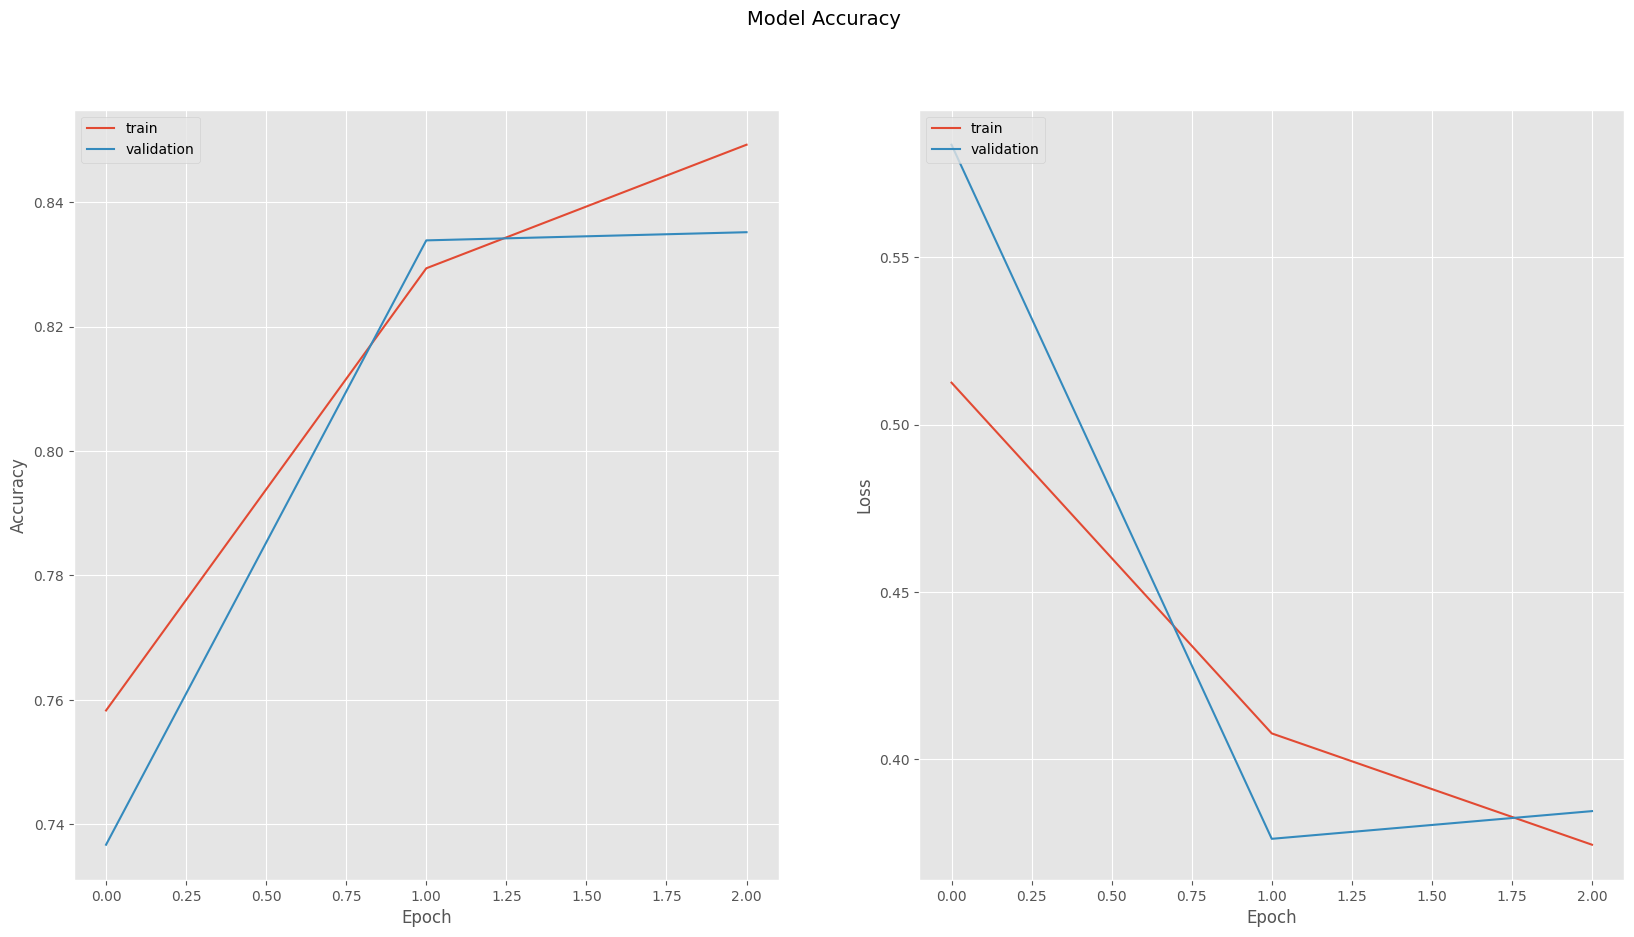

In [ ]:
plot_learning_curves(history_bert)

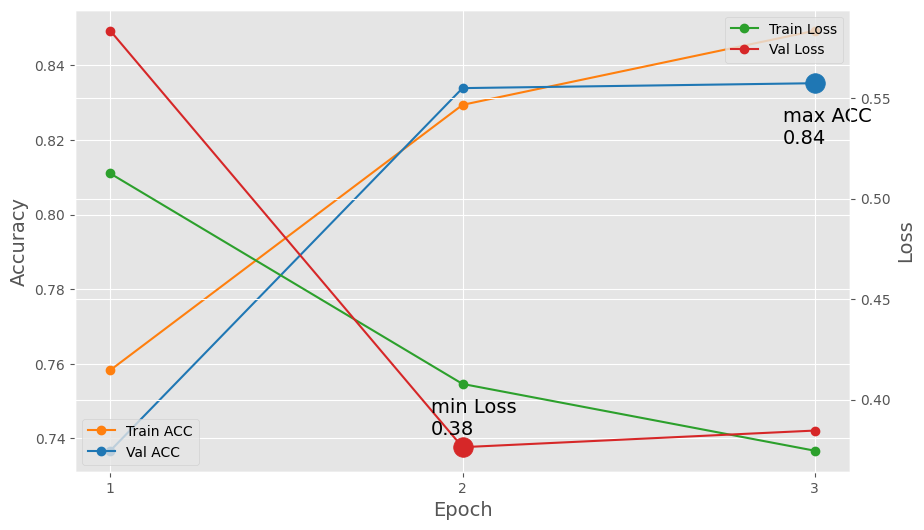

In [ ]:
plot_training_history(history_bert)

In [ ]:
learning_rate_val = 0.01

bert_large = TFAutoModel.from_pretrained('bert-base-uncased')

#and build and view parameters
BERT_large = build_model(bert_large, learning_rate = learning_rate_val) 

#print the summary of the model
BERT_large.summary()
checkpoint = tf.keras.callbacks.ModelCheckpoint('large_model.h5', monitor='val_loss', save_best_only = True, save_weights_only = True)


#train BERT
history_bert = BERT_large.fit([train_input_ids,train_attention_masks, meta_train], new_train.target,
                        validation_split = .2, epochs = 3, callbacks = [checkpoint], batch_size = BATCH_SIZE) 

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Training with additional dense layer...
Training with dropout...
Training with meta-data...
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 120)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
  

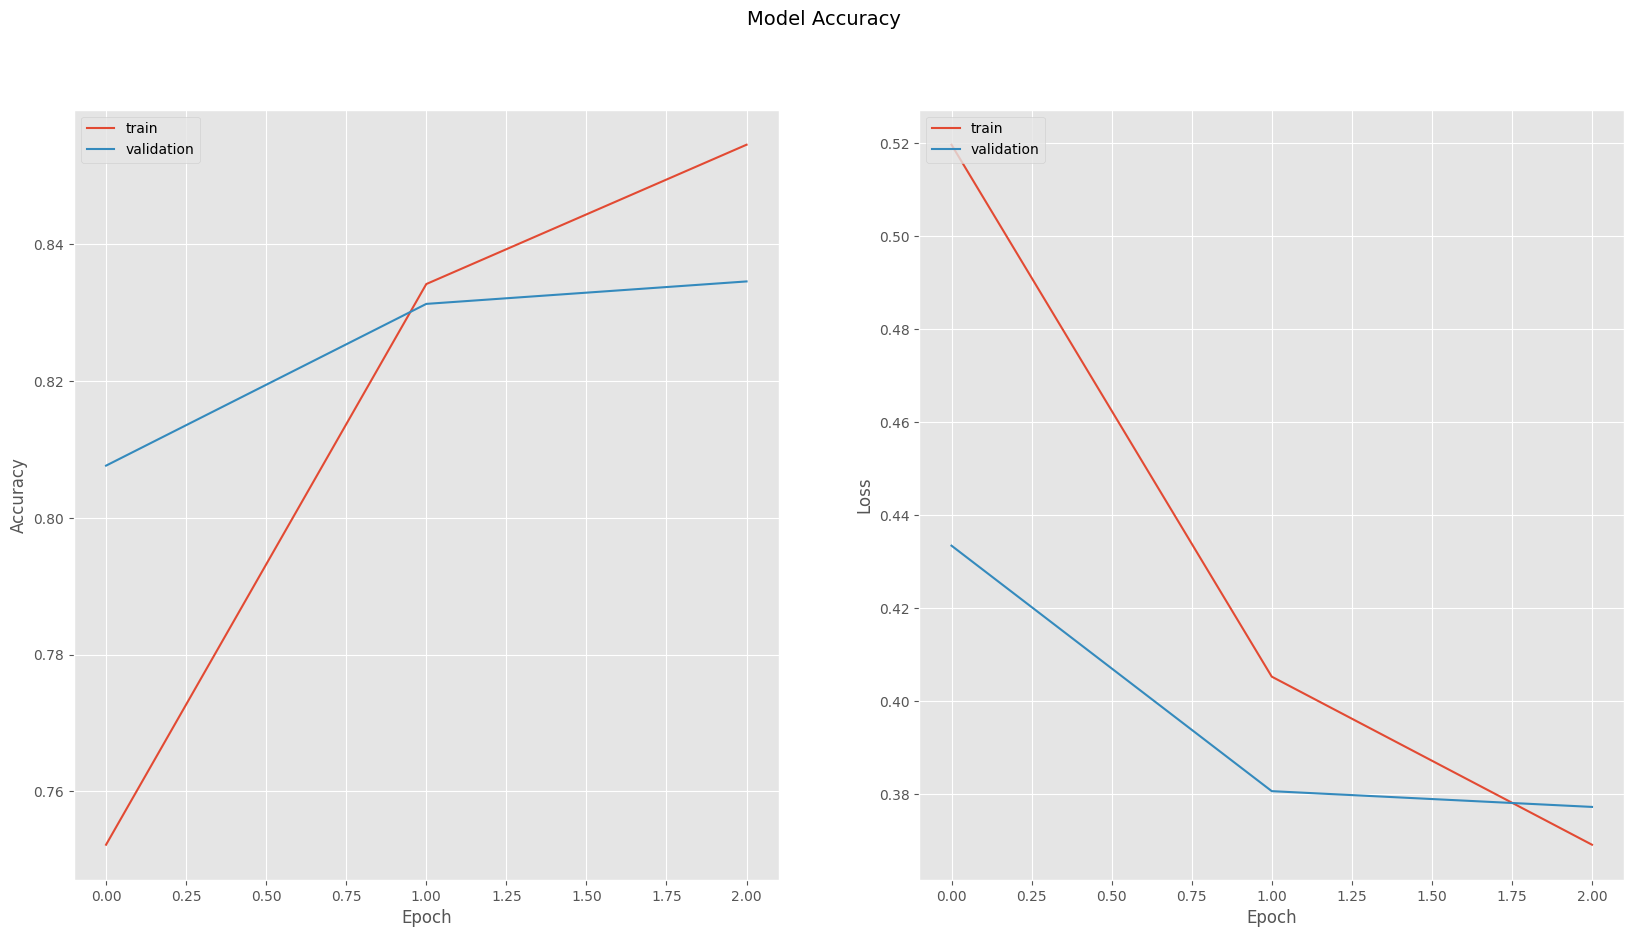

In [ ]:
plot_learning_curves(history_bert)

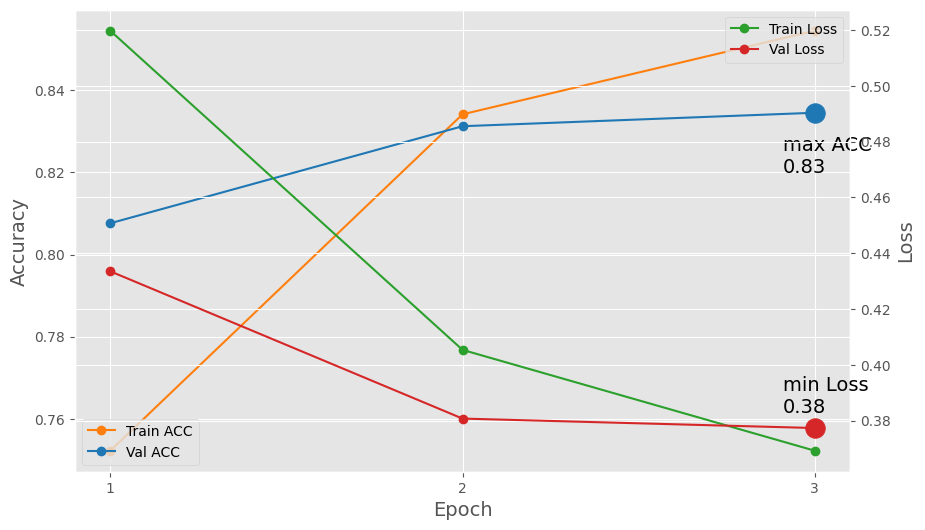

In [ ]:
plot_training_history(history_bert)

In [ ]:
learning_rate_val = 0.001

bert_large = TFAutoModel.from_pretrained('bert-base-uncased')

#and build and view parameters
BERT_large = build_model(bert_large, learning_rate = learning_rate_val) 

#print the summary of the model
BERT_large.summary()
checkpoint = tf.keras.callbacks.ModelCheckpoint('large_model.h5', monitor='val_loss', save_best_only = True, save_weights_only = True)


#train BERT
history_bert = BERT_large.fit([train_input_ids,train_attention_masks, meta_train], new_train.target,
                        validation_split = .2, epochs = 3, callbacks = [checkpoint], batch_size = BATCH_SIZE) 

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Training with additional dense layer...
Training with dropout...
Training with meta-data...
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 120)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
  

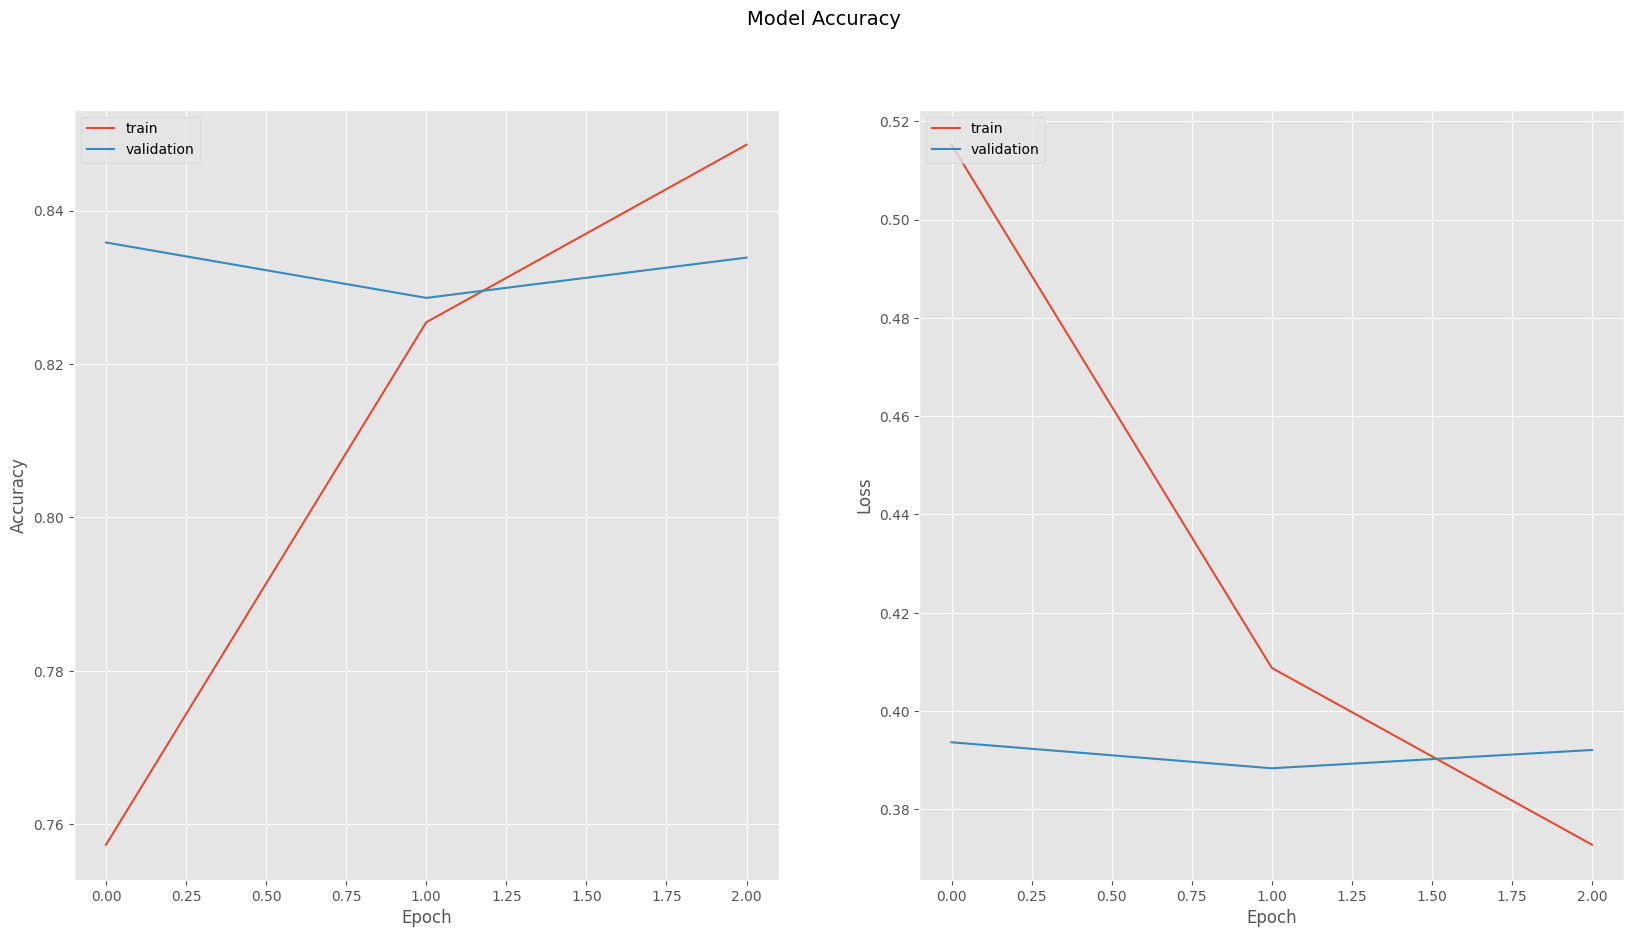

In [ ]:
plot_learning_curves(history_bert)

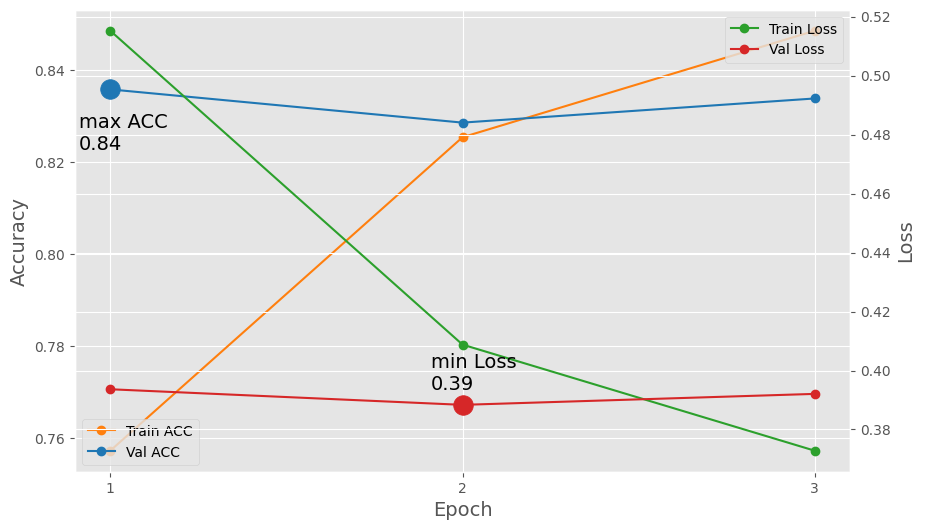

In [ ]:
plot_training_history(history_bert)

In [ ]:
learning_rate_val = 0.0001

bert_large = TFAutoModel.from_pretrained('bert-base-uncased')

#and build and view parameters
BERT_large = build_model(bert_large, learning_rate = learning_rate_val) 

#print the summary of the model
BERT_large.summary()
checkpoint = tf.keras.callbacks.ModelCheckpoint('large_model.h5', monitor='val_loss', save_best_only = True, save_weights_only = True)


#train BERT
history_bert = BERT_large.fit([train_input_ids,train_attention_masks, meta_train], new_train.target,
                        validation_split = .2, epochs = 3, callbacks = [checkpoint], batch_size = BATCH_SIZE) 

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Training with additional dense layer...
Training with dropout...
Training with meta-data...
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 120)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
  

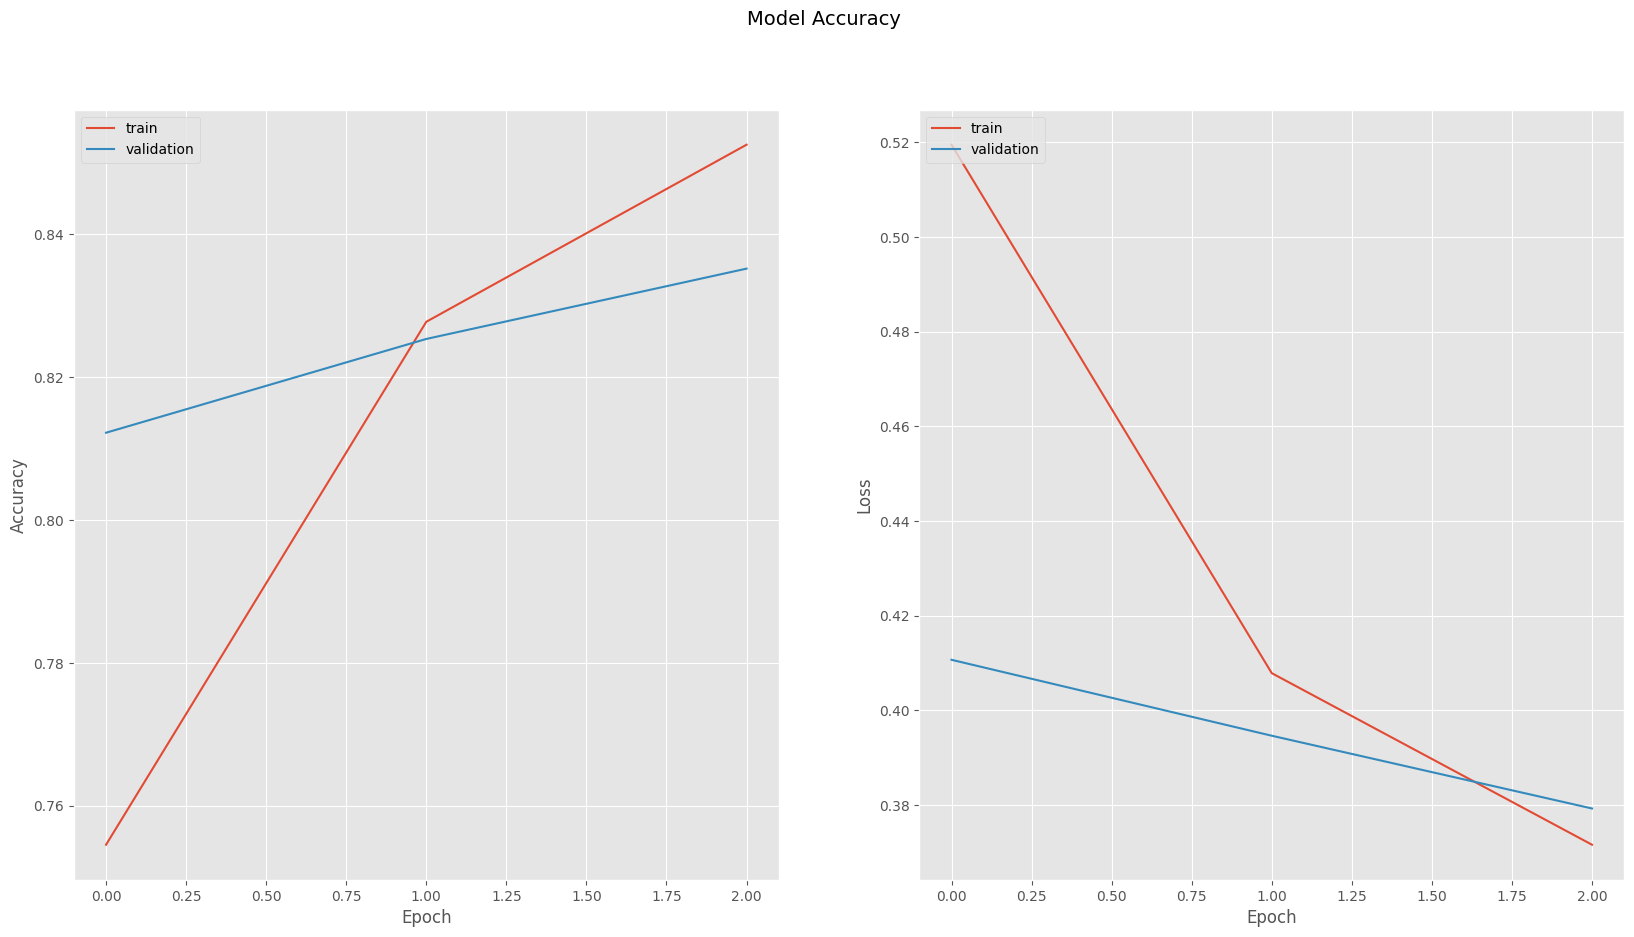

In [ ]:
plot_learning_curves(history_bert)

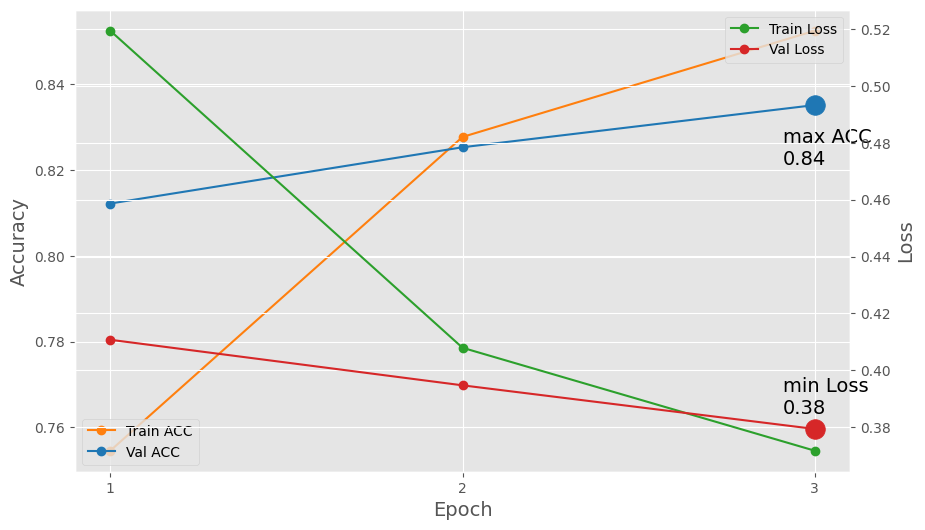

In [ ]:
plot_training_history(history_bert)

Training and Validation Accuracies after 3 epochs for each learning rate for the Bert + Meta-train model<br>


|Learning rates|Training Accuracy|Validation Accuracy|
|-|-|-|
|0.1|0.8493|0.8352|
|0.01|0.8545|0.8345|
|0.001|0.8486|0.8339|
|0.0001|0.8525|0.8352|

####Manual Validation Test for Bert Model + Meta Train

In [ ]:
import numpy as np
import pandas as pd

def random_rows(dataframe1, dataframe2, num_rows):
    # Get the number of rows in the DataFrame or NumPy array
    num_rows_total = len(dataframe1) if isinstance(dataframe1, pd.DataFrame) else dataframe1.shape[0]
    
    # Generate random indices for selecting rows
    indices = np.random.choice(num_rows_total, size=num_rows, replace=False)
    
    random_df1 = dataframe1.iloc[indices]
      
    random_df2 = dataframe2[indices]
        
    return random_df1, random_df2


In [ ]:
val_df_meta, val_df1 = random_rows(new_train, meta_train, 500)

In [ ]:
val_df_meta = val_df_meta.reset_index(drop=True)
val_train_ids, val_attention_masks = bert_encode(val_df_meta,120)

In [ ]:
BERT_large.load_weights('large_model.h5')

preds_bert_val = BERT_large.predict([val_train_ids,val_attention_masks,val_df1])

16/16 [==============================] - 4s 255ms/step


In [ ]:
submission_bert_val_meta = pd.DataFrame()
submission_bert_val_meta['id'] = val_df_meta.id
submission_bert_val_meta['prob'] = preds_bert_val
submission_bert_val_meta['target'] = np.round(submission_bert_val_meta['prob']).astype(int)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

print(classification_report(val_df_meta.target, submission_bert_val_meta['target']))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       286
           1       0.93      0.75      0.83       214

    accuracy                           0.87       500
   macro avg       0.88      0.86      0.86       500
weighted avg       0.88      0.87      0.87       500



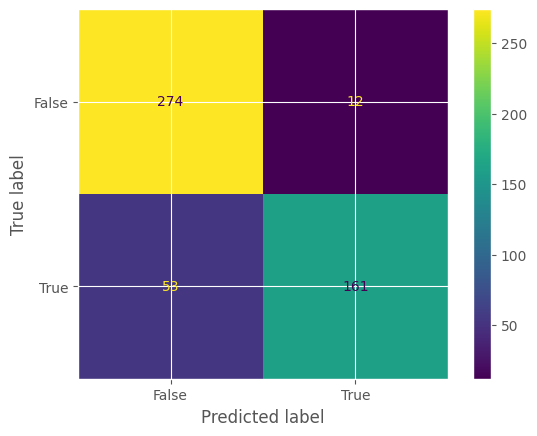

In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(val_df_meta.target, submission_bert_val_meta['target'])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
f1 = f1_score(val_df_meta.target, submission_bert_val_meta['target'])
print("The f1_score for the validation set is: ", f1)

The f1_score for the validation set is:  0.8320413436692506


####Predictions Test for Bert + Meta Train

In [ ]:
BERT_large.load_weights('large_model.h5')

preds_bert_meta = BERT_large.predict([test_input_ids,test_attention_masks, meta_test])

102/102 [==============================] - 30s 265ms/step


In [ ]:
#save as dataframe
submission_bert_meta = pd.DataFrame()
submission_bert_meta['id'] = test_id
submission_bert_meta['prob'] = preds_bert_meta
submission_bert_meta['target'] = np.round(submission_bert_meta['prob']).astype(int)
submission_bert_meta.head(100)

,id,prob,target
0,0,0.917562,1
1,2,0.943261,1
2,3,0.962610,1
3,9,0.975590,1
4,11,0.976469,1
...,...,...,...
95,323,0.093559,0
96,324,0.077039,0
97,325,0.226432,0
98,326,0.908976,1


In [ ]:
#and last but not least, submit
submission_bert = submission_bert_meta[['id', 'target']]
submission_bert.to_csv('Trinitee_Aniruddha_meta.csv', index = False)
print('Blended submission has been saved to disk')

Blended submission has been saved to disk


### Experiment II : Bert Model only

After training Bert with the meta-train data, we wanted to explore how the model would perform if we cleaned the data for anything besides texts. In this process we didn't want to use the meta-train data so that we could see the difference in the performance of the model. 

In [ ]:
new_train = pd.read_csv('/content/drive/My Drive/ML Group Project/train.csv') 
new_train['text'] = new_train['text'].apply(strip_all_entities)
new_train['text'] = new_train['text'].apply(clean)
new_train['text'] = new_train['text'].apply(expand_contractions)


new_test = pd.read_csv('/content/drive/My Drive/ML Group Project/test.csv')
new_test['text'] = new_test['text'].apply(strip_all_entities)
new_test['text'] = new_test['text'].apply(clean)
new_test['text'] = new_test['text'].apply(expand_contractions)

In [ ]:
#encode the training and testing data
train_input_ids,train_attention_masks = bert_encode(new_train,120)

test_input_ids,test_attention_masks = bert_encode(new_test,120)

In [ ]:
#choose batch size
BATCH_SIZE = 32

#how many epochs?
EPOCHS = 2

#use meta data?
USE_META = False

#add dense layer?
ADD_DENSE = True
DENSE_DIM = 124   

#add dropout?
ADD_DROPOUT = True
DROPOUT = 0.2

Trying different learning rates to see which performs the best with our model

In [ ]:
#get BERT layer

learning_rate_val = 0.1

bert_large_alone = TFAutoModel.from_pretrained('bert-base-uncased')

#and build and view parameters
BERT_large_alone = build_model(bert_large_alone, use_meta = False, learning_rate = learning_rate_val) 

#print the summary of the model
BERT_large_alone.summary()
checkpoint = tf.keras.callbacks.ModelCheckpoint('large_model_bert.h5', monitor='val_loss', save_best_only = True, save_weights_only = True)


#train BERT
history_bert_alone = BERT_large_alone.fit([train_input_ids,train_attention_masks], new_train.target,
                        validation_split = .2, epochs = 3, callbacks = [checkpoint], batch_size = BATCH_SIZE) 


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Training with additional dense layer...
Training with dropout...
Training without meta-data...
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 120)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               

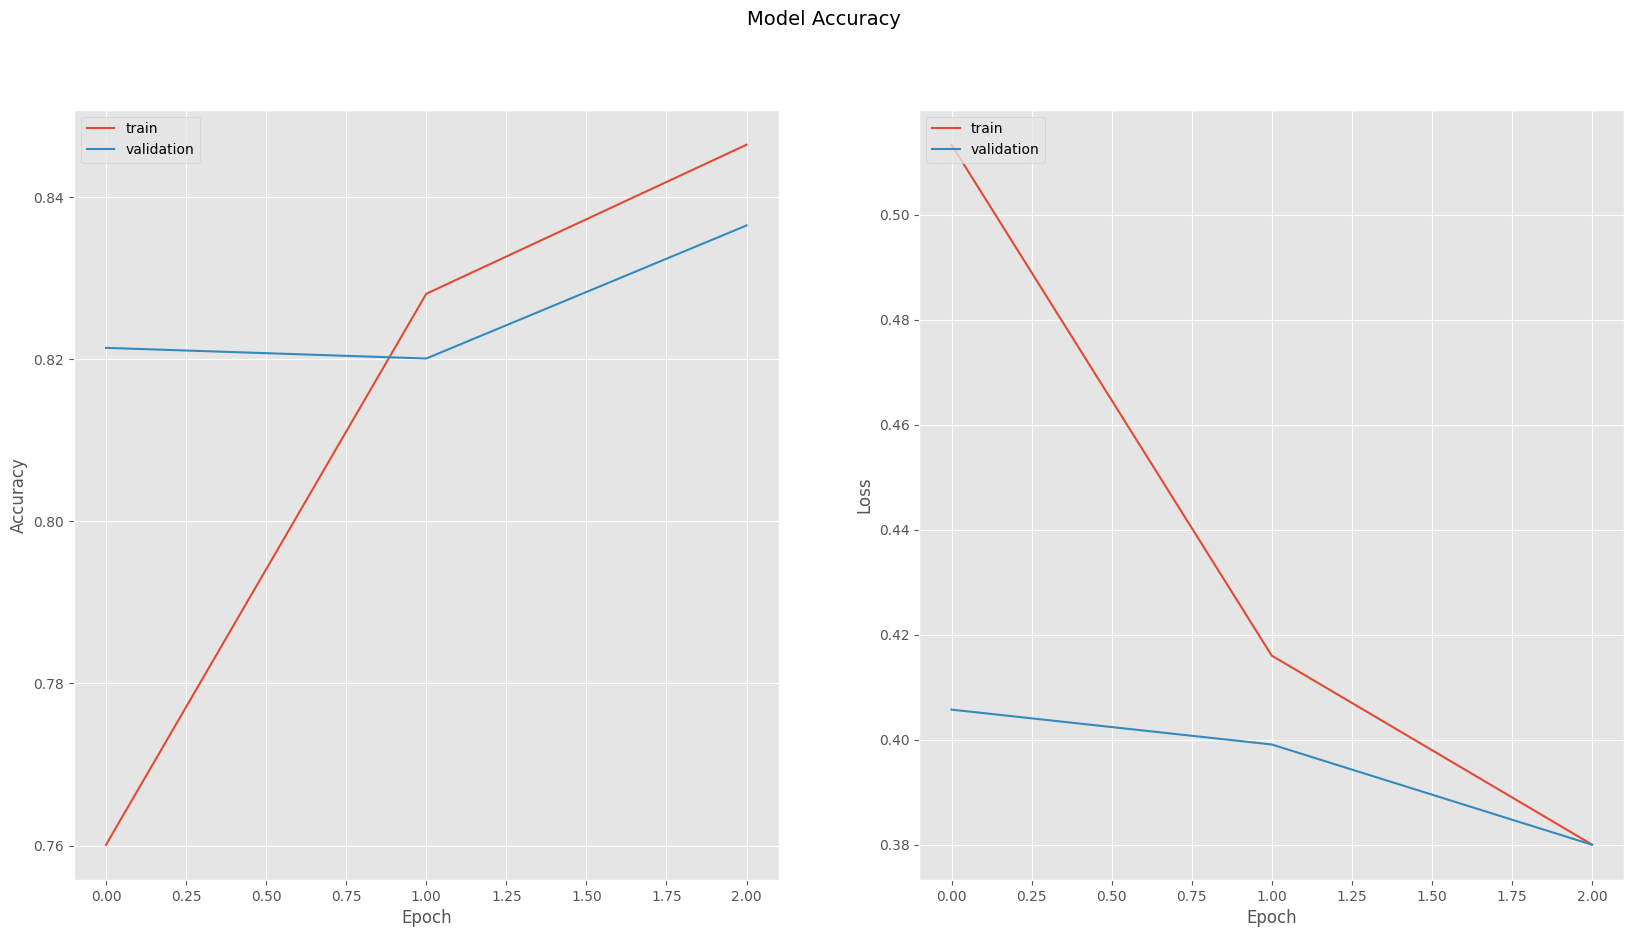

In [ ]:
plot_learning_curves(history_bert_alone)

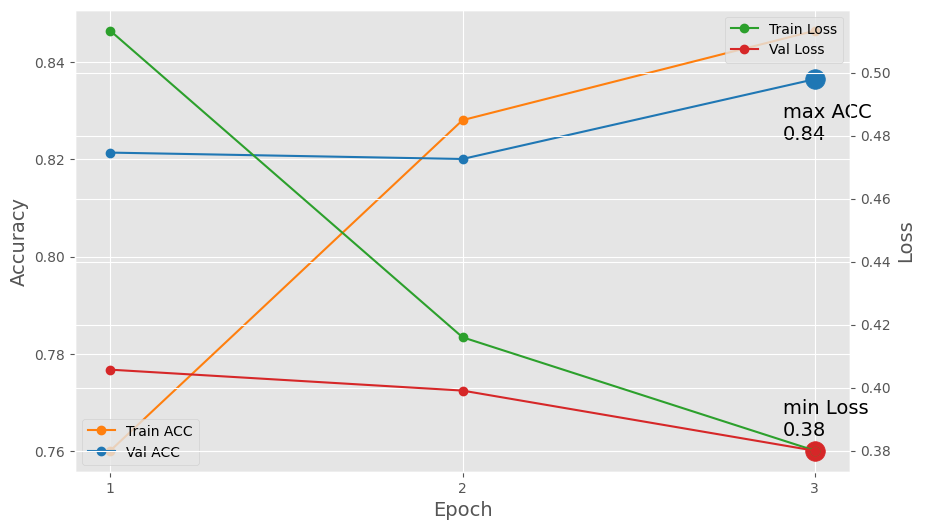

In [ ]:
plot_training_history(history_bert_alone)

In [ ]:
#get BERT layer

learning_rate_val = 0.01

bert_large_alone = TFAutoModel.from_pretrained('bert-base-uncased')

#and build and view parameters
BERT_large_alone = build_model(bert_large_alone, use_meta = False, learning_rate = learning_rate_val) 

#print the summary of the model
BERT_large_alone.summary()
checkpoint = tf.keras.callbacks.ModelCheckpoint('large_model_bert.h5', monitor='val_loss', save_best_only = True, save_weights_only = True)


#train BERT
history_bert_alone = BERT_large_alone.fit([train_input_ids,train_attention_masks], new_train.target,
                        validation_split = .2, epochs = 3, callbacks = [checkpoint], batch_size = BATCH_SIZE) 


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Training with additional dense layer...
Training with dropout...
Training without meta-data...
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 120)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               

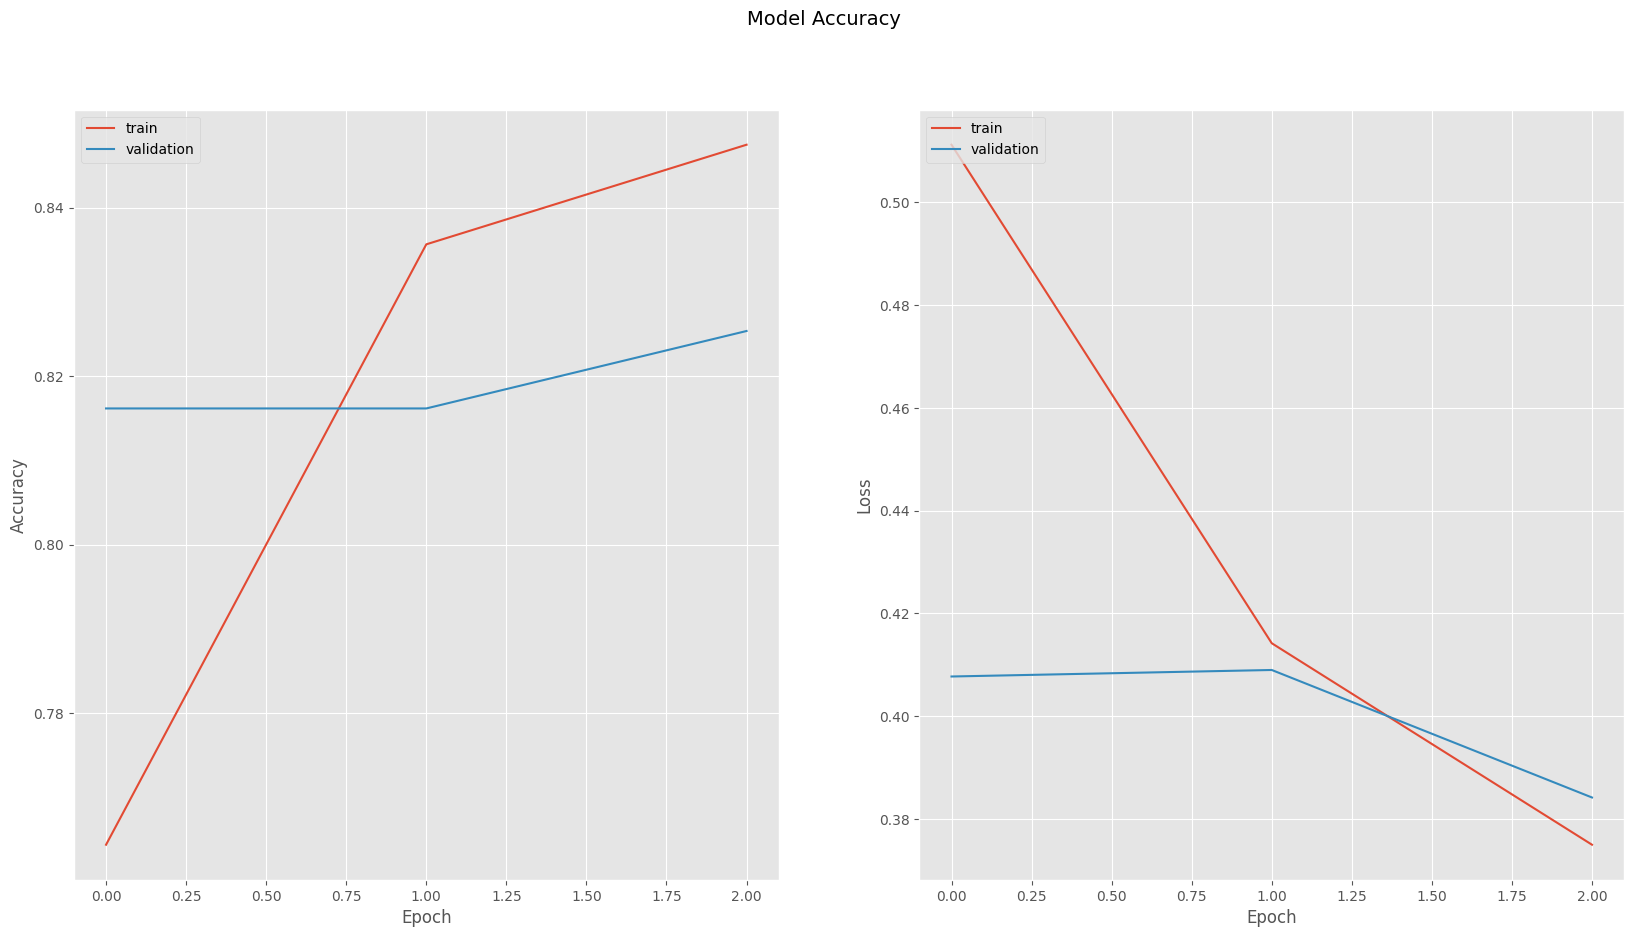

In [ ]:
plot_learning_curves(history_bert_alone)

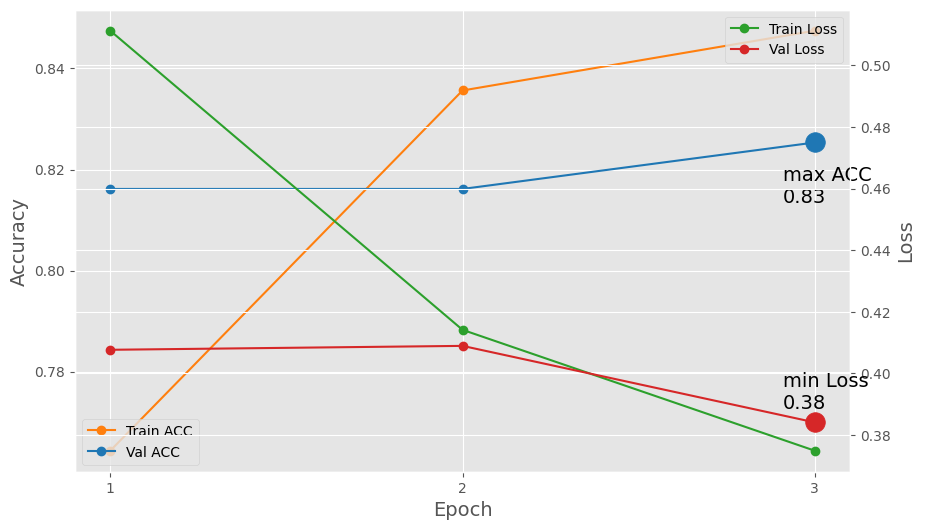

In [ ]:
plot_training_history(history_bert_alone)

In [ ]:
#get BERT layer

learning_rate_val = 0.001

bert_large_alone = TFAutoModel.from_pretrained('bert-base-uncased')

#and build and view parameters
BERT_large_alone = build_model(bert_large_alone, use_meta = False, learning_rate = learning_rate_val) 

#print the summary of the model
BERT_large_alone.summary()
checkpoint = tf.keras.callbacks.ModelCheckpoint('large_model_bert.h5', monitor='val_loss', save_best_only = True, save_weights_only = True)


#train BERT
history_bert_alone = BERT_large_alone.fit([train_input_ids,train_attention_masks], new_train.target,
                        validation_split = .2, epochs = 3, callbacks = [checkpoint], batch_size = BATCH_SIZE) 


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Training with additional dense layer...
Training with dropout...
Training without meta-data...
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 120)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               

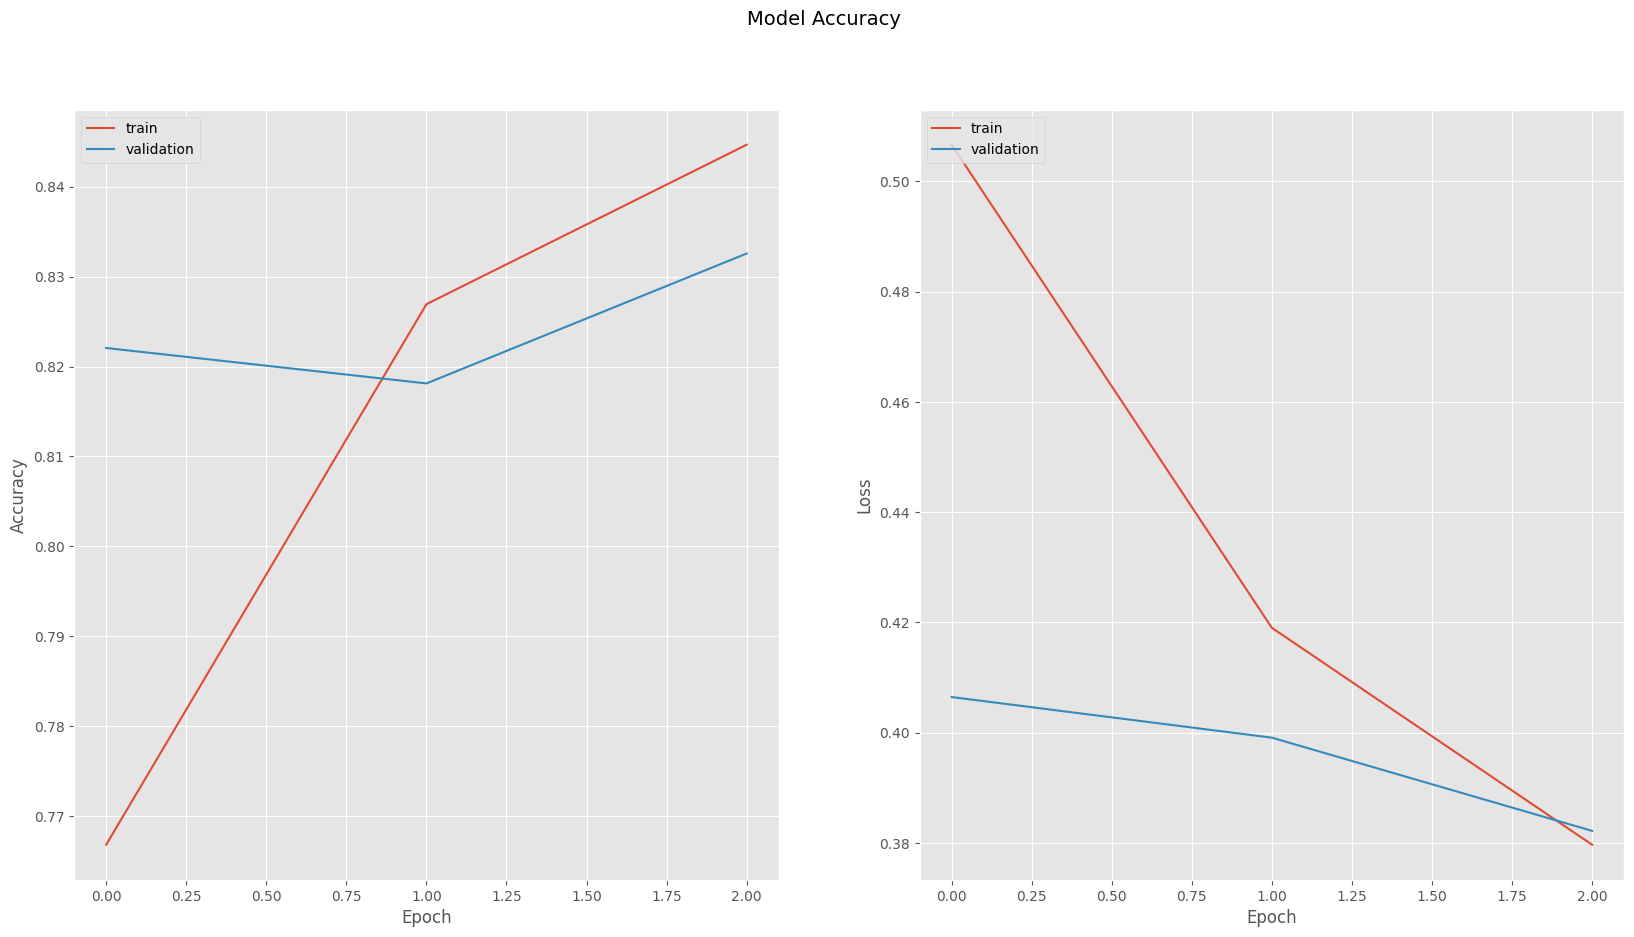

In [ ]:
plot_learning_curves(history_bert_alone)

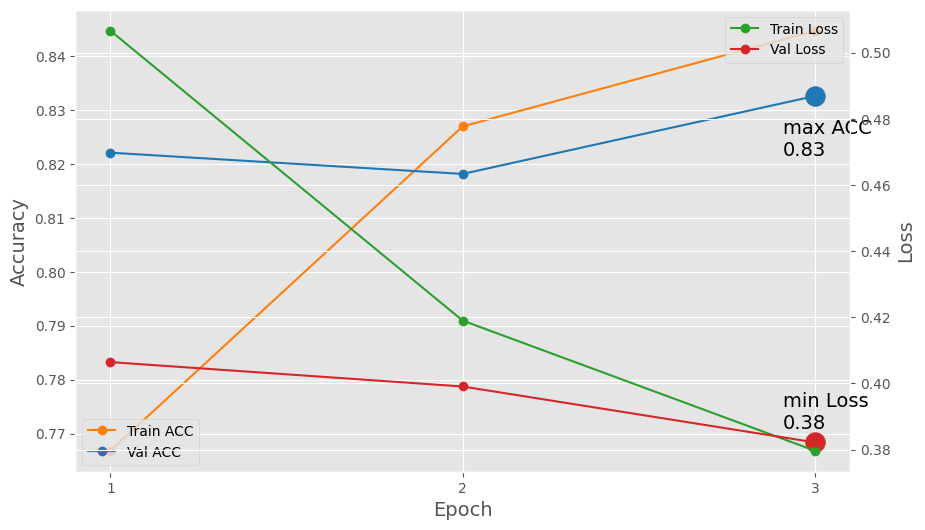

In [ ]:
plot_training_history(history_bert_alone)

In [ ]:
#get BERT layer

learning_rate_val = 0.0001

bert_large_alone = TFAutoModel.from_pretrained('bert-base-uncased')

#and build and view parameters
BERT_large_alone = build_model(bert_large_alone, use_meta = False, learning_rate = learning_rate_val) 

#print the summary of the model
BERT_large_alone.summary()
checkpoint = tf.keras.callbacks.ModelCheckpoint('large_model_bert.h5', monitor='val_loss', save_best_only = True, save_weights_only = True)


#train BERT
history_bert_alone = BERT_large_alone.fit([train_input_ids,train_attention_masks], new_train.target,
                        validation_split = .2, epochs = 3, callbacks = [checkpoint], batch_size = BATCH_SIZE) 


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Training with additional dense layer...
Training with dropout...
Training without meta-data...
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 120)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               

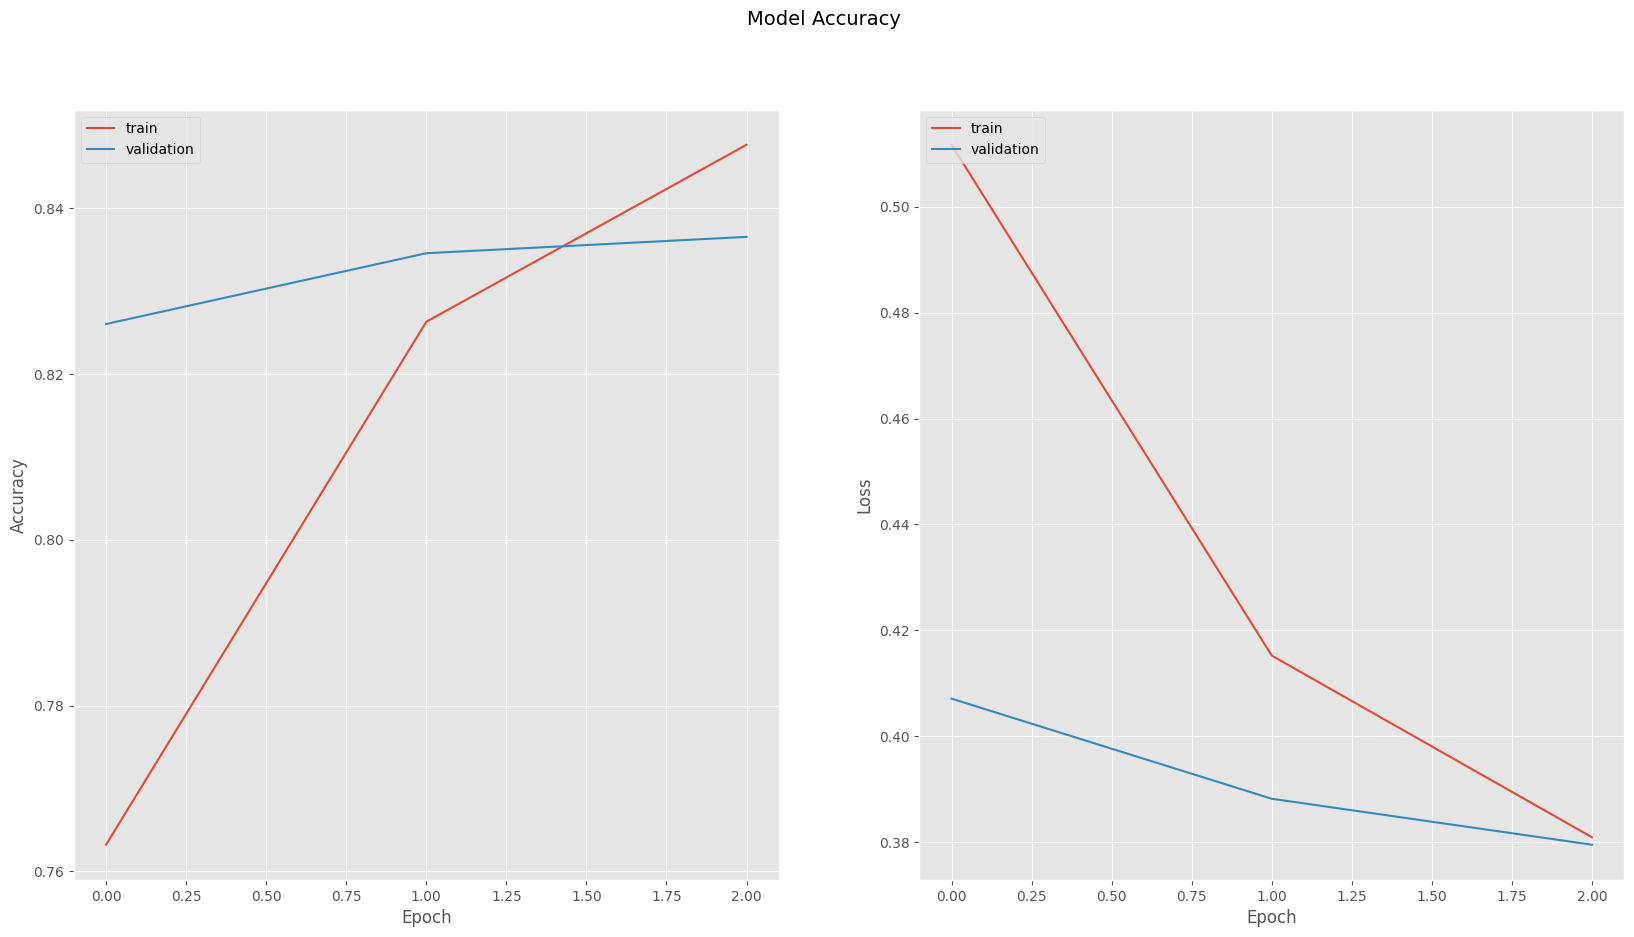

In [ ]:
plot_learning_curves(history_bert_alone)

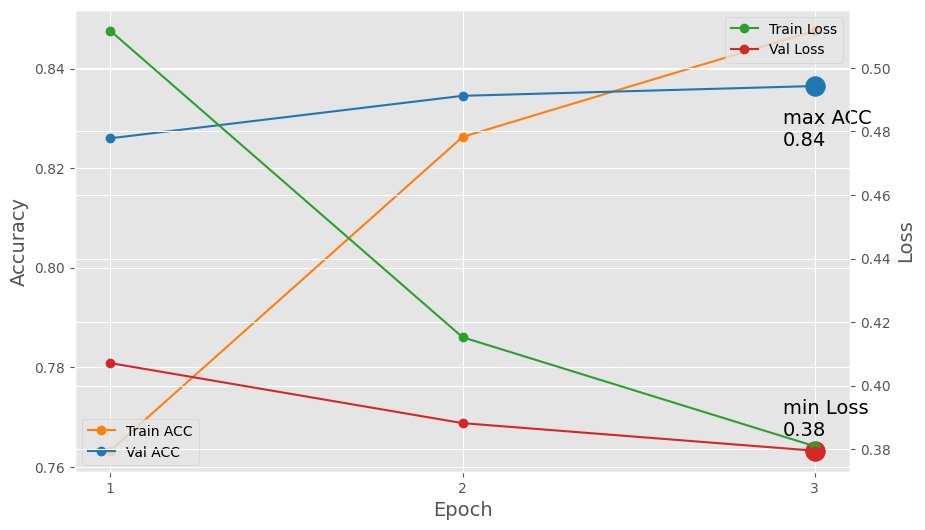

In [ ]:
plot_training_history(history_bert_alone)

Training and Validation Accuracies after 3 epochs for each learning rate for the Bert only model<br>


|Learning rates|Training Accuracy|Validation Accuracy|
|-|-|-|
|0.1|0.8465|0.8365|
|0.01|0.8545|0.8345|
|0.001|0.8447|0.8326|
|0.0001|0.8476|0.8365|

#### Manual Validation Test for Bert Model

In [ ]:
#function to extract random rows from the training dataset
import pandas as pd
import numpy as np

def random_rows_alone(dataframe):
    # Get the total number of rows in the DataFrame
    num_rows = len(dataframe)

    # Generate 500 random integers between 0 and the number of rows
    indices = np.random.randint(0, num_rows, size=500)

    # Use the indices to select the random rows from the DataFrame
    random_df = dataframe.iloc[indices]

    # Create a new DataFrame with the random rows
    new_df = pd.DataFrame(random_df)

    return new_df


In [ ]:
val_df = random_rows_alone(new_train)

In [ ]:
val_df = val_df.reset_index(drop=True)
val_train_ids, val_attention_masks = bert_encode(val_df,120)

In [ ]:
BERT_large_alone.load_weights('large_model_bert.h5')

preds_bert_val = BERT_large_alone.predict([val_train_ids,val_attention_masks])

16/16 [==============================] - 4s 257ms/step


In [ ]:
submission_bert_val = pd.DataFrame()
submission_bert_val['id'] = val_df.id
submission_bert_val['prob'] = preds_bert_val
submission_bert_val['target'] = np.round(submission_bert_val['prob']).astype(int)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

print(classification_report(val_df.target, submission_bert_val['target']))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       283
           1       0.94      0.85      0.90       217

    accuracy                           0.91       500
   macro avg       0.92      0.91      0.91       500
weighted avg       0.92      0.91      0.91       500



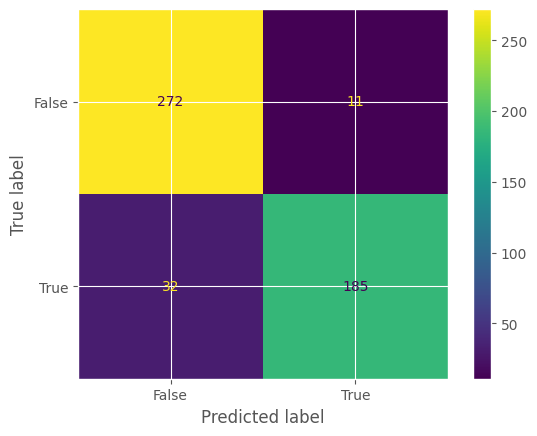

In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(val_df.target, submission_bert_val['target'])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
f1 = f1_score(val_df.target, submission_bert_val['target'])
print("The f1_score for the validation set is: ", f1)

The f1_score for the validation set is:  0.8958837772397094


#### Predictions on Test Data

In [ ]:
BERT_large_alone.load_weights('large_model_bert.h5')

preds_bert = BERT_large_alone.predict([test_input_ids,test_attention_masks])

102/102 [==============================] - 27s 268ms/step


In [ ]:
#save as dataframe
submission_bert = pd.DataFrame()
submission_bert['id'] = test_id
submission_bert['prob'] = preds_bert
submission_bert['target'] = np.round(submission_bert['prob']).astype(int)
submission_bert.head(100)

In [ ]:
#and last but not least, submit
submission_bert = submission_bert[['id', 'target']]
submission_bert.to_csv('Trinitee_Aniruddha.csv', index = False)
print('Blended submission has been saved to disk')

Blended submission has been saved to disk


# Conclusion & Error Analysis

Final Training and Validation Accuracies for each model experimented<br>


|Model|Training Accuracy|Validation Accuracy|
|-|-|-|
|Baseline|0.60|0.60|
|CNN|0.8519|0.7722|
|BERT Model + Meta Train|0.8425|0.8352|
|BERT Model |0.8476|0.8365|

##Error Analysis on Experiment I

In [ ]:
# Define your training data, target labels, and predictions

y_prob = None

# Create a dataframe with the training data, target labels, and predictions
df = pd.DataFrame({'X_train': val_df_meta['text'], 'y_train': val_df_meta.target, 'y_pred': submission_bert_val_meta['target']})

# Identify cases where the classifier made an error
df['is_error'] = df['y_train'] != df['y_pred']
error_cases = df[df['is_error']]

# Print the number of errors and the error rate
n_errors = len(error_cases)
error_rate = n_errors / len(df)
print(f'Number of errors: {n_errors}')
print(f'Error rate: {error_rate:.2%}')

# Define a function to display the training data for a given error case
def display_error_case(case_index):
    X = error_cases.iloc[case_index]['X_train']
    y_true = error_cases.iloc[case_index]['y_train']
    y_pred = error_cases.iloc[case_index]['y_pred']
    print(f'Training data: {X}')
    print(f'Target label: {y_pred}') # fix the label mixup
    print(f'Prediction: {y_true}') # fix the label mixup

# Allow the user to review the top 10 error cases
for i in range(15):
    if i >= n_errors:
        break
    print(f'Error case {i + 1}:')
    display_error_case(i)
    print()


Number of errors: 65
Error rate: 13.00%
Error case 1:
Training data: of Newport a big thanks for the emergency run to pick Jackie up from Bristol temple messages much appreciated
Target label: 0
Prediction: 1

Error case 2:
Training data: Perspectives on Terrorism Understanding Jihadi Proto States
Target label: 0
Prediction: 1

Error case 3:
Training data: Two hours to get to a client meeting Whirlwind of emotions with this tubestrike
Target label: 0
Prediction: 1

Error case 4:
Training data: tianta Breaking news Unconfirmed I just heard a loud bang nearby in what appears to be a blast of wind from my neighbour s ass
Target label: 0
Prediction: 1

Error case 5:
Training data: What if he committed a mass murder
Target label: 0
Prediction: 1

Error case 6:
Training data: re your example low food prices cause farmers to go broke famine next year means simple Capitalism failed to feed people gt
Target label: 1
Prediction: 0

Error case 7:
Training data: Butt Trauma Extraordinaire
Target l

##Error Analysis on Experiment II

In [ ]:
# Define your training data, target labels, and predictions

y_prob = None

# Create a dataframe with the training data, target labels, and predictions
df = pd.DataFrame({'X_train': val_df['text'], 'y_train': val_df.target, 'y_pred': submission_bert_val['target']})

# Identify cases where the classifier made an error
df['is_error'] = df['y_train'] != df['y_pred']
error_cases = df[df['is_error']]

# Print the number of errors and the error rate
n_errors = len(error_cases)
error_rate = n_errors / len(df)
print(f'Number of errors: {n_errors}')
print(f'Error rate: {error_rate:.2%}')

# Define a function to display the training data for a given error case
def display_error_case(case_index):
    X = error_cases.iloc[case_index]['X_train']
    y_true = error_cases.iloc[case_index]['y_train']
    y_pred = error_cases.iloc[case_index]['y_pred']
    print(f'Training data: {X}')
    print(f'Target label: {y_pred}') # fix the label mixup
    print(f'Prediction: {y_true}') # fix the label mixup

# Allow the user to review the top 10 error cases
for i in range(15):
    if i >= n_errors:
        break
    print(f'Error case {i + 1}:')
    display_error_case(i)
    print()

Number of errors: 56
Error rate: 11.20%
Error case 1:
Training data: Until my death I ll forever rep the Jets
Target label: 0
Prediction: 1

Error case 2:
Training data: The sunset looked like an erupting volcano My initial thought was the Pixar short Lava
Target label: 0
Prediction: 1

Error case 3:
Training data: head It hit the wall behind him with a loud bang Language Drake shouted at him before getting up I m going out stay
Target label: 0
Prediction: 1

Error case 4:
Training data: I just checked in at On Fire on LoveFood
Target label: 0
Prediction: 1

Error case 5:
Training data: Rationing of food and water may also become necessary during an emergency such as a natural disaster or terror attack
Target label: 1
Prediction: 0

Error case 6:
Training data: Well Saturn doesn t exist anymore So the collision place has a starting estimate of 4000 That s 3 times what my car is worth
Target label: 0
Prediction: 1

Error case 7:
Training data: Four Things That May Ruin Your Personal Inj

## Last Thoughts


After looking at the errors in both of the experiments, it looks like both of the models are predicting a tweet to be a disaster tweet if there are trigger words such as: fire, death, terrorism et cetera mentioned. Eventhough these words have a deeper negative meaning to themselves, some are used as slangs whereas others are used in discussions and normal conversations. 

Inorder to address this issue, in the near future a model that has been pre-trained on tweets can be experiment. Models of such nature should be able to capture the context better incomparison to our BERT model.

Our training data was also small. A larger tweet dataset can be used in the future to boost the performance of our models.